In [1]:
# Install library piml
!pip install piml

# Import

In [2]:
# Import Library

#Untuk Explore dan Preprocessing Data
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import external
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#Untuk Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import joblib

#Untuk Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Untuk Evaluasi Model
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, RocCurveDisplay

#Untuk Interpretasi Model
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay

# Data Exploration

In [27]:
# Eksplorasi Data

# Import Dataset
url = 'https://raw.githubusercontent.com/triantonugroho/Thesis/refs/heads/main/Dataset/9000.csv'
df = pd.read_csv(url)

In [28]:
# Menampilkan 5 data pertama
df.head()

Work      Marital_Status  Hours_Week        Country  \
0  Self-emp-not-inc  Married-civ-spouse          13  United-States   
1           Private            Divorced          40  United-States   
2           Private  Married-civ-spouse          40  United-States   
3           Private  Married-civ-spouse          40           Cuba   
4           Private  Married-civ-spouse          40  United-States   

  Above_Below_50K  Education  Gender         Occupation  CustomerID  Age  ...  \
0           <=50K  Bachelors    Male    Exec-managerial         902   50  ...   
1           <=50K    HS-grad    Male  Handlers-cleaners        5506   38  ...   
2           <=50K       11th    Male  Handlers-cleaners        3869   53  ...   
3           <=50K  Bachelors  Female     Prof-specialty        7106   28  ...   
4           <=50K    Masters  Female    Exec-managerial        1760   37  ...   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                      YES               71610   
1                0          0                        ?                5070   
2                2          3                       NO               34650   
3                1          2                       NO               63400   
4                0          1                       NO                6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_year  \
0         6510          13020          52080       Saab      2004   
1          780            780           3510   Mercedes      2007   
2         7700           3850          23100      Dodge      2007   
3         6340           6340          50720  Chevrolet      2014   
4         1300            650           4550     Accura      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 37 columns]

In [29]:
# Menampilkan 5 data terakhir
df.tail()

Work      Marital_Status  Hours_Week        Country  \
8995           Private  Married-civ-spouse          40  United-States   
8996           Private  Married-civ-spouse          48  United-States   
8997  Self-emp-not-inc  Married-civ-spouse          18  United-States   
8998  Self-emp-not-inc            Divorced          40  United-States   
8999           Private       Never-married          48  United-States   

     Above_Below_50K Education Gender         Occupation  CustomerID  Age  \
8995           <=50K   HS-grad   Male       Craft-repair        7854   53   
8996           <=50K   HS-grad   Male  Handlers-cleaners        9226   20   
8997           <=50K   1st-4th   Male   Transport-moving        6695   58   
8998           <=50K   HS-grad   Male              Sales        5402   51   
8999           <=50K   HS-grad   Male  Handlers-cleaners         622   25   

      ...  bodily_injuries  witnesses  police_report_available  \
8995  ...                0          1                        ?   
8996  ...                2          3                        ?   
8997  ...                2          3                      YES   
8998  ...                0          1                      YES   
8999  ...                0          3                        ?   

      total_claim_amount injury_claim property_claim  vehicle_claim  \
8995               87200        17440           8720          61040   
8996              108480        18080          18080          72320   
8997               67500         7500           7500          52500   
8998               46980         5220           5220          36540   
8999                5060          460            920           3680   

       auto_make auto_year fraud_reported  
8995       Honda      2006              N  
8996  Volkswagen      2015              N  
8997      Suburu      1996              N  
8998        Audi      1998              N  
8999    Mercedes      2007              N  

[5 rows x 37 columns]

In [30]:
# Menampilkan Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Work                         9000 non-null   object 
 1   Marital_Status               9000 non-null   object 
 2   Hours_Week                   9000 non-null   int64  
 3   Country                      9000 non-null   object 
 4   Above_Below_50K              9000 non-null   object 
 5   Education                    9000 non-null   object 
 6   Gender                       9000 non-null   object 
 7   Occupation                   9000 non-null   object 
 8   CustomerID                   9000 non-null   int64  
 9   Age                          9000 non-null   int64  
 10  months_as_customer           9000 non-null   int64  
 11  policy_deductable            9000 non-null   int64  
 12  policy_annual_premium        9000 non-null   float64
 13  insured_zip       

In [31]:
# Menampilkan tipe data
df.dtypes

Work                            object
Marital_Status                  object
Hours_Week                       int64
Country                         object
Above_Below_50K                 object
Education                       object
Gender                          object
Occupation                      object
CustomerID                       int64
Age                              int64
months_as_customer               int64
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_hobbies                 object
insured_relationship            object
capital_gains                    int64
capital_loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [32]:
# Memeriksa duplikasi data
df.duplicated(keep=False).sum()

0

In [33]:
# Hitung jumlah tanda tanya '?' di setiap kolom
missing_question_mark = (df == '?').sum()

# Tampilkan hasil
print(missing_question_mark[missing_question_mark > 0])  # hanya tampilkan kolom yang memiliki '?'


Work                        534
Country                     164
Occupation                  535
collision_type             1602
property_damage            3240
police_report_available    3087
dtype: int64


In [34]:
# Mengganti '?' menjadi NaN

import numpy as np

# Ganti semua '?' menjadi NaN di seluruh df
df.replace('?', np.nan, inplace=True)


In [35]:
# Memeriksa keberadaan missing value
df.isna().sum()

Work                            534
Marital_Status                    0
Hours_Week                        0
Country                         164
Above_Below_50K                   0
Education                         0
Gender                            0
Occupation                      535
CustomerID                        0
Age                               0
months_as_customer                0
policy_deductable                 0
policy_annual_premium             0
insured_zip                       0
insured_hobbies                   0
insured_relationship              0
capital_gains                     0
capital_loss                      0
incident_type                     0
collision_type                 1602
incident_severity                 0
authorities_contacted             0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                3240
bodily_injuries             

In [36]:
# Map YES→1, NO→0, sisanya jadi NaN
mapping = {'YES': 1, 'NO': 0}
df['property_damage'] = df['property_damage'].map(mapping)
df['police_report_available'] = df['police_report_available'].map(mapping)

In [37]:
# Menghapus kolom tidak relevan
to_drop = [
    'Country', 'CustomerID', 'incident_location',
    'incident_city', 'insured_zip', 'insured_hobbies']
df= df.drop(columns=to_drop)

In [38]:
# Mengecek '?'
missing_per_col = (df == '?').sum().sort_values(ascending=False)
print(missing_per_col)


Work                           0
incident_severity              0
auto_year                      0
auto_make                      0
vehicle_claim                  0
property_claim                 0
injury_claim                   0
total_claim_amount             0
police_report_available        0
witnesses                      0
bodily_injuries                0
property_damage                0
number_of_vehicles_involved    0
incident_hour_of_the_day       0
authorities_contacted          0
collision_type                 0
Marital_Status                 0
incident_type                  0
capital_loss                   0
capital_gains                  0
insured_relationship           0
policy_annual_premium          0
policy_deductable              0
months_as_customer             0
Age                            0
Occupation                     0
Gender                         0
Education                      0
Above_Below_50K                0
Hours_Week                     0
fraud_repo

In [39]:
# Memeriksa keberadaan missing value
df.isna().sum()

Work                            534
Marital_Status                    0
Hours_Week                        0
Above_Below_50K                   0
Education                         0
Gender                            0
Occupation                      535
Age                               0
months_as_customer                0
policy_deductable                 0
policy_annual_premium             0
insured_relationship              0
capital_gains                     0
capital_loss                      0
incident_type                     0
collision_type                 1602
incident_severity                 0
authorities_contacted             0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                3240
bodily_injuries                   0
witnesses                         0
police_report_available        3087
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim               

In [40]:
# Menghitung nilai unik dari setiap kolom
df.nunique()

Work                             8
Marital_Status                   7
Hours_Week                      81
Above_Below_50K                  2
Education                       16
Gender                           2
Occupation                      14
Age                             71
months_as_customer             391
policy_deductable                3
policy_annual_premium          991
insured_relationship             6
capital_gains                  338
capital_loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make           

In [41]:
# Menghitung persentase missing value
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
print(missing_pct.loc[['property_damage',
                       'police_report_available',
                       'collision_type',
                       'Occupation',
                       'Work']])


property_damage            36.000000
police_report_available    34.300000
collision_type             17.800000
Occupation                  5.944444
Work                        5.933333
dtype: float64


In [42]:
# Menghapus kolom dengan persentase missing value besar
cols_to_drop = ['property_damage','police_report_available','collision_type']
df.drop(columns=cols_to_drop, inplace=True)




In [43]:
# Menghapus baris yang terdapat missing value
initial_len = len(df)
df.dropna(subset=['Occupation', 'Work'], inplace=True)
print(f"Dropped {initial_len - len(df)} rows; remaining {len(df)} rows")


Dropped 535 rows; remaining 8465 rows


In [44]:
# Memeriksa keberadaan missing value
df.isna().sum()

Work                           0
Marital_Status                 0
Hours_Week                     0
Above_Below_50K                0
Education                      0
Gender                         0
Occupation                     0
Age                            0
months_as_customer             0
policy_deductable              0
policy_annual_premium          0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_type                  0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_year                      0
fraud_reported                 0
dtype: int64

In [45]:
# Statistika Deskriptif
df.describe()

Hours_Week          Age  months_as_customer  policy_deductable  \
count  8465.000000  8465.000000         8465.000000        8465.000000   
mean     41.103485    38.371057          204.121677        1133.195511   
std      11.932879    13.070170          114.800507         610.350242   
min       1.000000    17.000000            0.000000         500.000000   
25%      40.000000    28.000000          116.000000         500.000000   
50%      40.000000    37.000000          200.000000        1000.000000   
75%      45.000000    47.000000          277.000000        2000.000000   
max      99.000000    90.000000          479.000000        2000.000000   

       policy_annual_premium  capital_gains   capital_loss  \
count            8465.000000    8465.000000    8465.000000   
mean             1257.105457   25066.603662  -26753.809805   
std               243.606513   27845.708793   28090.573952   
min               433.330000       0.000000 -111100.000000   
25%              1088.340000       0.000000  -51400.000000   
50%              1257.360000       0.000000  -22400.000000   
75%              1415.680000   51000.000000       0.000000   
max              2047.590000  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               8465.000000                  8465.000000      8465.000000   
mean                  11.656586                     1.839220         0.994093   
std                    6.938859                     1.018159         0.819604   
min                    0.000000                     1.000000         0.000000   
25%                    6.000000                     1.000000         0.000000   
50%                   12.000000                     1.000000         1.000000   
75%                   17.000000                     3.000000         2.000000   
max                   23.000000                     4.000000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  8465.000000         8465.000000   8465.000000     8465.000000   
mean      1.480921        52720.051979   7436.513881     7375.212050   
std       1.111738        26413.151736   4891.116929     4823.757801   
min       0.000000          100.000000      0.000000        0.000000   
25%       0.000000        41700.000000   4280.000000     4420.000000   
50%       1.000000        57900.000000   6770.000000     6730.000000   
75%       2.000000        70590.000000  11360.000000    10860.000000   
max       3.000000       114920.000000  21450.000000    23670.000000   

       vehicle_claim    auto_year  
count    8465.000000  8465.000000  
mean    37908.326048  2005.079031  
std     18887.169251     6.005394  
min        70.000000  1995.000000  
25%     30240.000000  2000.000000  
50%     42080.000000  2005.000000  
75%     50890.000000  2010.000000  
max     79560.000000  2015.000000

In [46]:
# Mengatur gaya plotting menjadi "whitegrid"
sns.set(style='whitegrid')

In [47]:
# Menentukan fitur kategorik
cat_features = ['Work','Marital_Status','Above_Below_50K','Education','Gender','Occupation',
                'insured_relationship','incident_type','auto_make','authorities_contacted']

In [48]:
# Menentukan fitur numerik
num_features = ['Hours_Week','Age','months_as_customer','policy_deductable',
                'policy_annual_premium','capital_gains','capital_loss',
                'incident_hour_of_the_day','number_of_vehicles_involved','incident_severity',
                'bodily_injuries','witnesses','total_claim_amount',
                'injury_claim','property_claim',
                'vehicle_claim','auto_year']

In [49]:
# Menghitung jumlah fitur kategorik dan numerik
len(cat_features), len(num_features)

(10, 17)

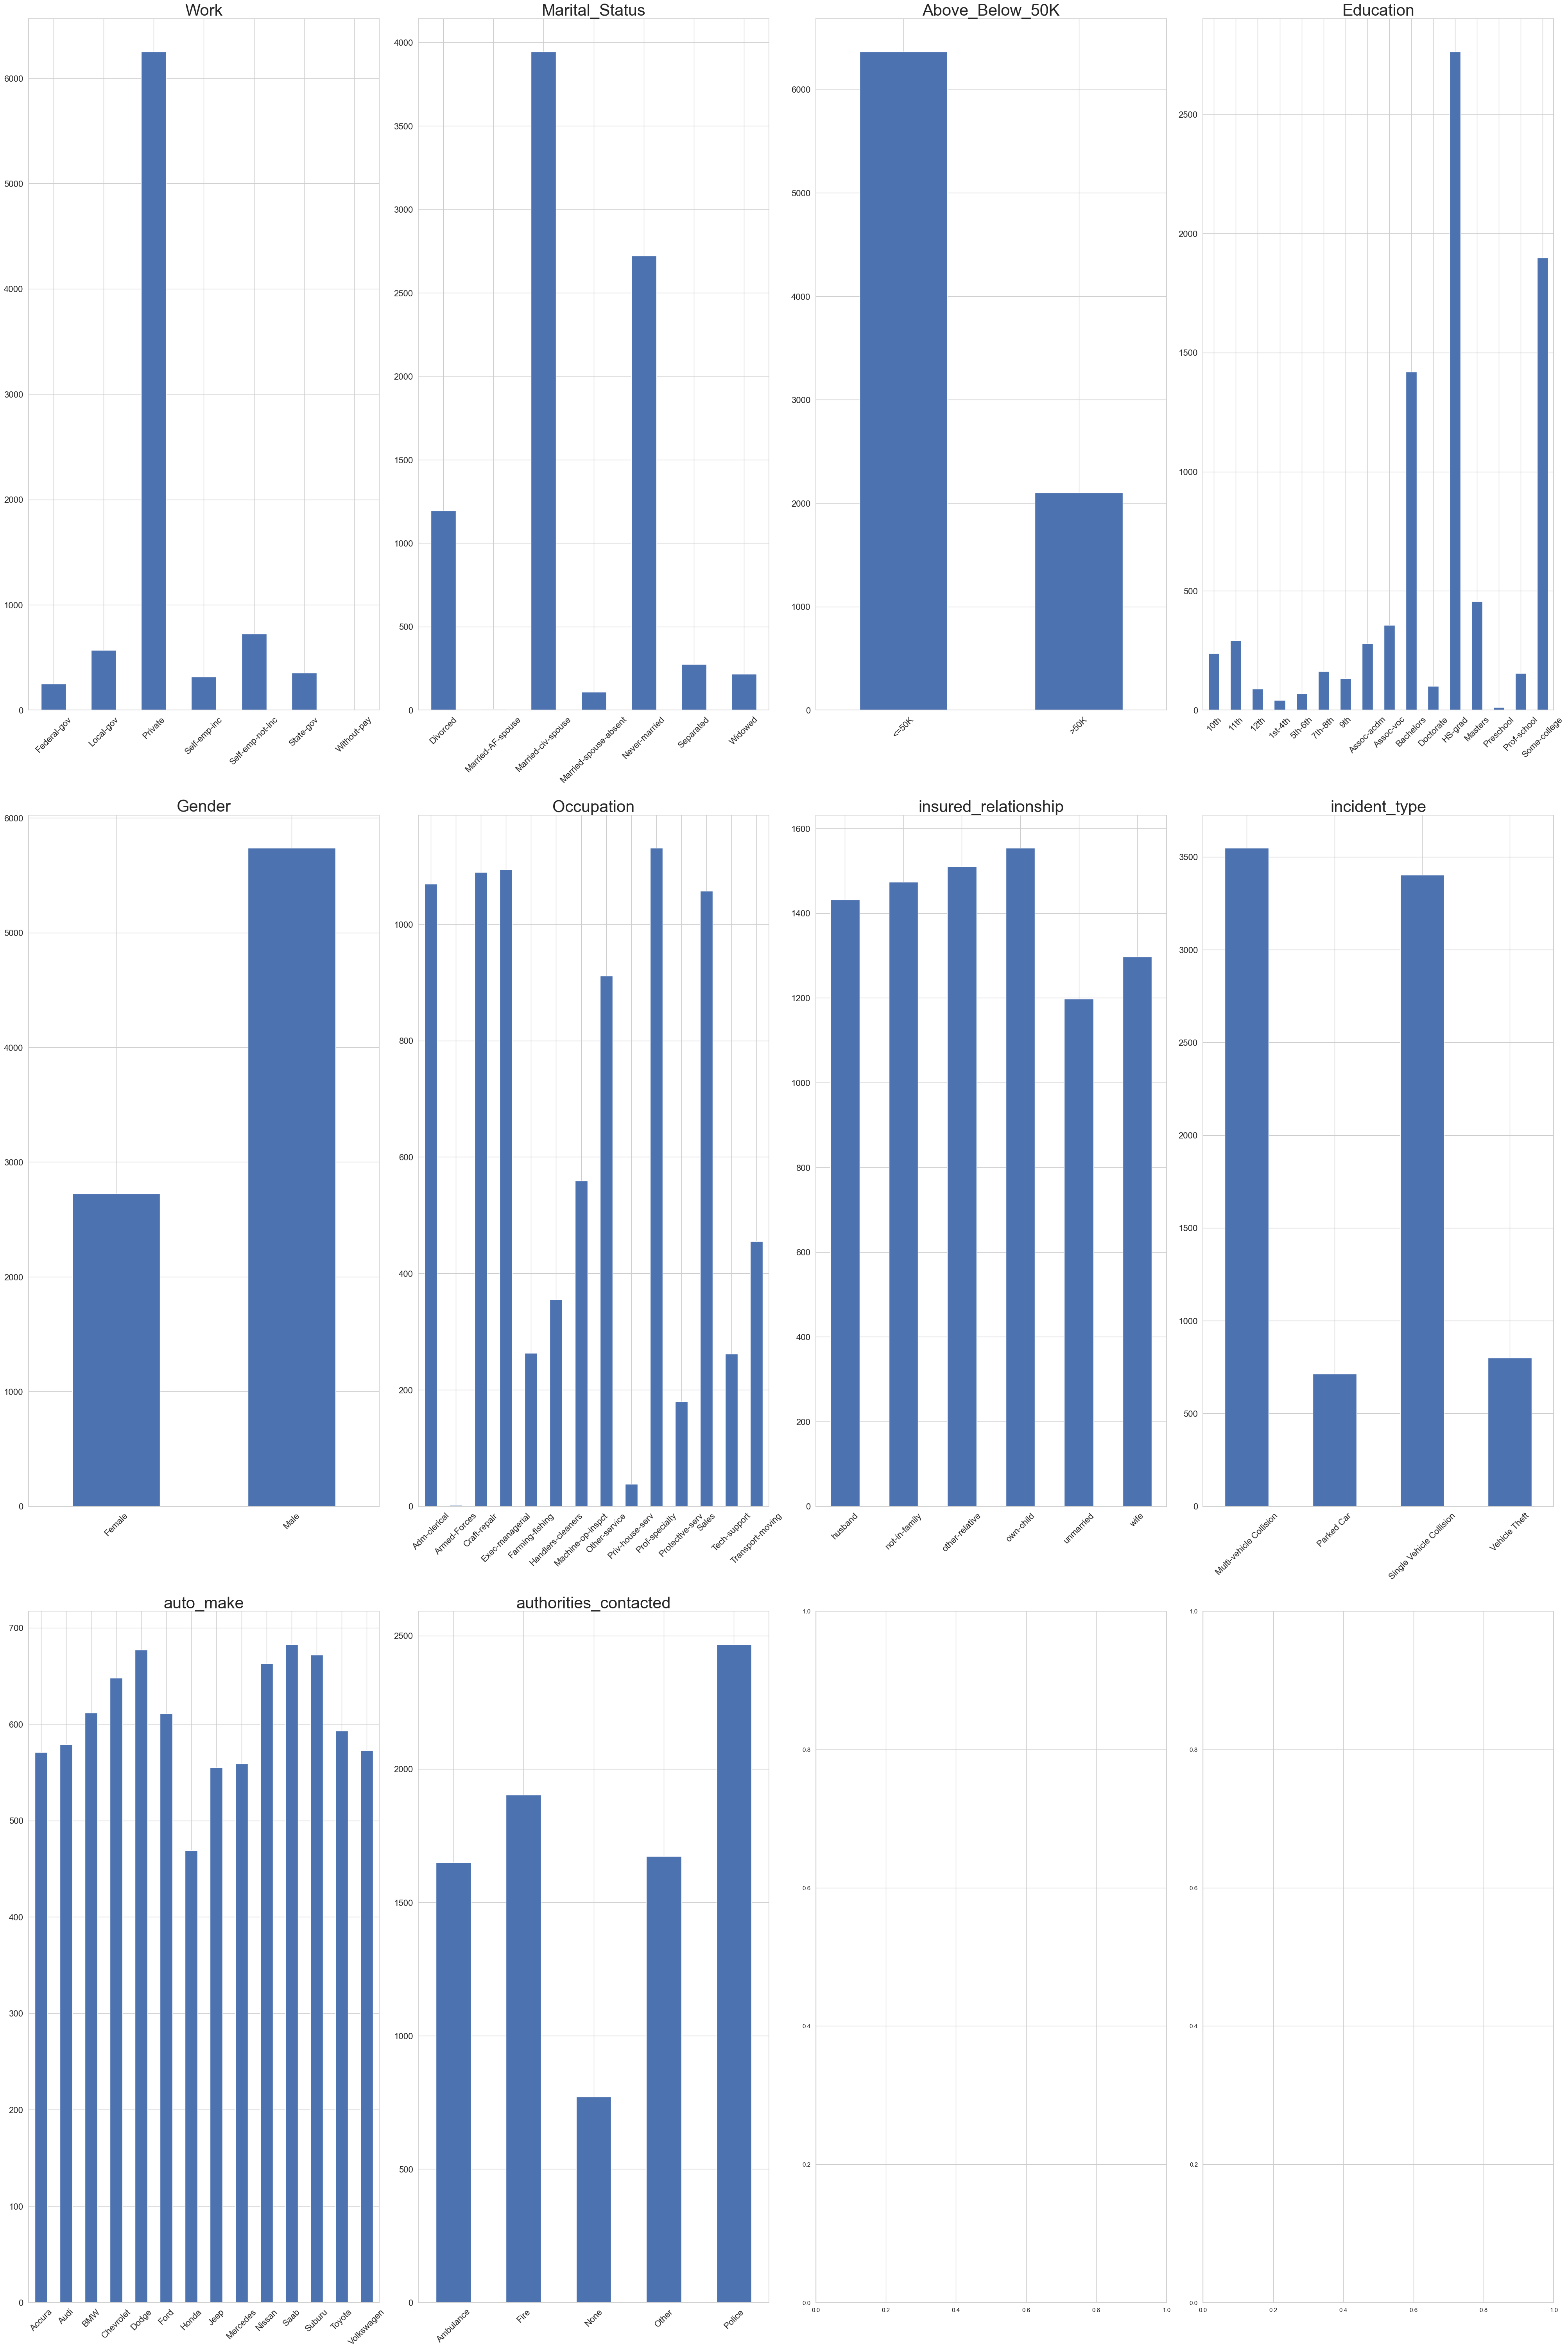

In [ ]:
# Visualisasi fitur kategorik
fig, ax = plt.subplots(3, 4, figsize=(40,60), constrained_layout=True)
for i in range(5):
    for j in range(4):
        if 4*i + j < len(cat_features):
            df[cat_features[4*i + j]].value_counts().sort_index().plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=16)
            ax[i, j].set_title(cat_features[4*i + j], size=30)

IndexError: list index out of range

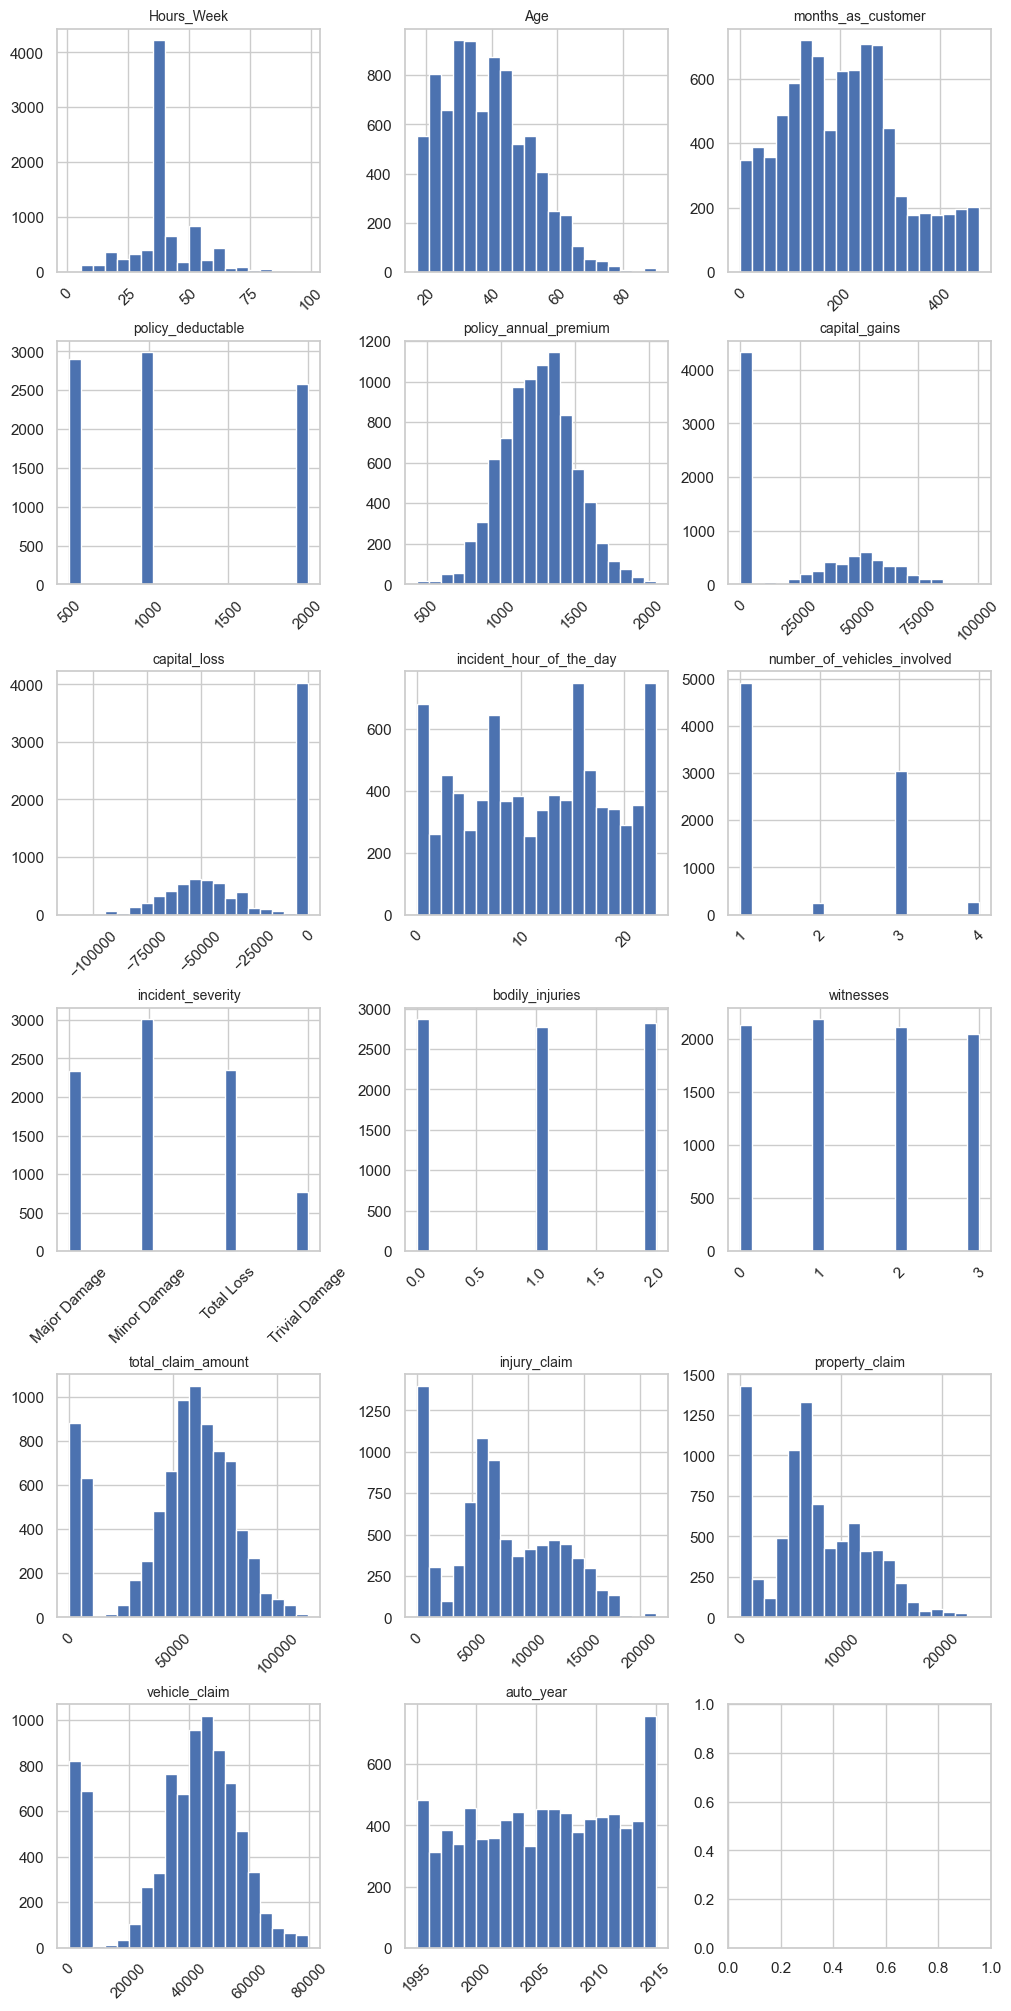

In [ ]:
# Visualisasi fitur numerik
fig, ax = plt.subplots(6, 3, figsize=(10,20), constrained_layout=True)
for i in range(6):
    for j in range(3):
        if 2*i + j < len(num_features):
            df[num_features[3*i + j]].hist(bins=20, ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].set_title(num_features[3*i + j],size=10)

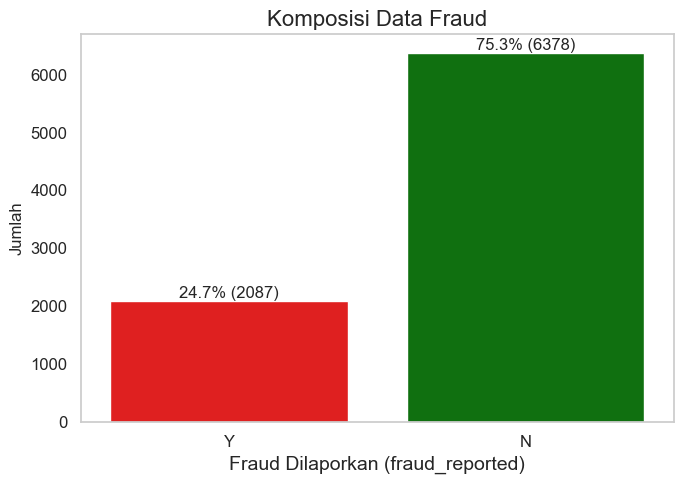

In [50]:
# Visualisasi Komposisi Data Fraud
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom fraud_reported bertipe string
df['fraud_reported'] = df['fraud_reported'].astype(str)

plt.figure(figsize=(7, 5))

# Pewarnaan berdasarkan kelas
palette = {'Y': 'red', 'N': 'green'}

# Plot countplot
ax = sns.countplot(
    data=df,
    x='fraud_reported',
    hue='fraud_reported',
    palette=palette,
    dodge=False,
    legend=False
)

# Atur tampilan
plt.xticks(size=12)
plt.xlabel('Fraud Dilaporkan (fraud_reported)', size=14)
plt.yticks(size=12)
plt.ylabel('Jumlah', size=12)
plt.title("Komposisi Data Fraud", size=16)

# Tambahkan label: persentase (jumlah)
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f'{percentage:.1f}% ({count})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)
    ax.yaxis.grid(False)

plt.tight_layout()
plt.show()


# Pre-Pipeline

In [51]:
# Pre-Pipeline 

# 1. Hapus baris yang mengandung missing values
df = df.dropna()

# 2. Map nilai '<=50K' → 0, '>50K' → 1 di kolom Above_Below_50K
df['Above_Below_50K'] = df['Above_Below_50K'].map({'<=50K': 0, '>50K': 1})

# 3. Tampilkan 5 baris pertama
df.head(5)


Work      Marital_Status  Hours_Week  Above_Below_50K  \
0  Self-emp-not-inc  Married-civ-spouse          13                0   
1           Private            Divorced          40                0   
2           Private  Married-civ-spouse          40                0   
3           Private  Married-civ-spouse          40                0   
4           Private  Married-civ-spouse          40                0   

   Education  Gender         Occupation  Age  months_as_customer  \
0  Bachelors    Male    Exec-managerial   50                 328   
1    HS-grad    Male  Handlers-cleaners   38                 228   
2       11th    Male  Handlers-cleaners   53                 134   
3  Bachelors  Female     Prof-specialty   28                 256   
4    Masters  Female    Exec-managerial   37                 228   

   policy_deductable  ...  number_of_vehicles_involved bodily_injuries  \
0               1000  ...                            1               1   
1               2000  ...                            1               0   
2               2000  ...                            3               2   
3               2000  ...                            1               1   
4               1000  ...                            1               0   

   witnesses  total_claim_amount injury_claim property_claim vehicle_claim  \
0          2               71610         6510          13020         52080   
1          0                5070          780            780          3510   
2          3               34650         7700           3850         23100   
3          2               63400         6340           6340         50720   
4          1                6500         1300            650          4550   

   auto_make  auto_year  fraud_reported  
0       Saab       2004               Y  
1   Mercedes       2007               Y  
2      Dodge       2007               N  
3  Chevrolet       2014               Y  
4     Accura       2009               N  

[5 rows x 28 columns]

In [52]:
# Label Encoding Kolom Target
label_1 = df['fraud_reported']
label = label_1.replace({'N': 0, 'Y': 1})
data = df.drop(['fraud_reported'], axis=1)
feature_names = data.columns

In [53]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(data,label, train_size=0.8, random_state=1)

In [54]:
# Menampilkan x_train
x_train

Work      Marital_Status  Hours_Week  Above_Below_50K  \
6094           Private  Married-civ-spouse          40                0   
583   Self-emp-not-inc       Never-married          40                0   
2244         Local-gov            Divorced          40                0   
4632           Private       Never-married          40                0   
4992           Private       Never-married          40                0   
...                ...                 ...         ...              ...   
3094         Local-gov       Never-married          40                0   
8311         State-gov           Separated          35                0   
965       Self-emp-inc  Married-civ-spouse          60                1   
5554           Private           Separated          40                0   
249            Private  Married-civ-spouse          40                1   

         Education  Gender         Occupation  Age  months_as_customer  \
6094       HS-grad    Male       Craft-repair   59                 271   
583      Bachelors    Male       Tech-support   31                 242   
2244       HS-grad  Female       Adm-clerical   64                  95   
4632    Assoc-acdm    Male     Prof-specialty   28                 287   
4992       5th-6th  Female  Machine-op-inspct   43                  94   
...            ...     ...                ...  ...                 ...   
3094     Bachelors  Female     Prof-specialty   24                 271   
8311       HS-grad  Female       Adm-clerical   54                  10   
965   Some-college    Male              Sales   35                  80   
5554  Some-college  Female      Other-service   37                 204   
249    Prof-school  Female     Prof-specialty   41                  94   

      policy_deductable  ...  incident_hour_of_the_day  \
6094                500  ...                        21   
583                2000  ...                         3   
2244               1000  ...                         3   
4632               1000  ...                        19   
4992                500  ...                         6   
...                 ...  ...                       ...   
3094                500  ...                        21   
8311               2000  ...                         3   
965                1000  ...                        12   
5554                500  ...                        10   
249                2000  ...                        19   

     number_of_vehicles_involved  bodily_injuries  witnesses  \
6094                           3                1          0   
583                            3                0          1   
2244                           1                1          2   
4632                           1                0          2   
4992                           3                1          2   
...                          ...              ...        ...   
3094                           3                1          0   
8311                           3                0          3   
965                            1                0          0   
5554                           3                1          2   
249                            1                1          3   

     total_claim_amount injury_claim property_claim  vehicle_claim  auto_make  \
6094              93720        17040           8520          68160   Mercedes   
583               68090        12380          12380          43330     Toyota   
2244               3200          640            320           2240   Mercedes   
4632              53800         5380           5380          43040     Accura   
4992              36700         3670           7340          25690     Nissan   
...                 ...          ...            ...            ...        ...   
3094              93720        17040           8520          68160   Mercedes   
8311              31350         2850           5700          22800      Honda   
965               90400         9

In [55]:
# Menampilkan y_train
y_train

6094    0
583     0
2244    0
4632    0
4992    0
       ..
3094    0
8311    1
965     0
5554    0
249     0
Name: fraud_reported, Length: 6772, dtype: int64

In [56]:
# Menentukan pipeline preprocessing

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# 1) Definisikan urutan level pendidikan
edu_levels = [
    'Preschool',
    '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college',
    'Assoc-voc', 'Assoc-acdm',
    'Bachelors',
    'Masters',
    'Prof-school',
    'Doctorate'
]

# 2) Kelompokkan kolom
ord_col = ['Education']
cat_col = [
    'Work','Marital_Status','Gender','Occupation', 'authorities_contacted', 
    'insured_relationship','incident_type','auto_make', 'incident_severity'
]
num_col = [
    'Hours_Week','Age','months_as_customer','policy_deductable','Above_Below_50K',
    'policy_annual_premium','capital_gains','capital_loss',
    'incident_hour_of_the_day','number_of_vehicles_involved',
    'bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim',
    'vehicle_claim','auto_year'
]

# 3) Buat transformer untuk masing-masing
numerical_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

ordinal_transformer = Pipeline([
    ('ord_enc', OrdinalEncoder(
        categories=[edu_levels],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

categorical_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 4) Gabungkan ke ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', numerical_transformer, num_col),
    ('ord', ordinal_transformer,  ord_col),
    ('cat', categorical_transformer, cat_col)
], remainder='drop')


# DATA BALANCING (SMOTE)

In [35]:
import joblib

# Ganti path dengan path file .pkl hasil penyimpanan
loaded_pipeline = joblib.load("dt9_models/dt9_gridsearch_full_20250617_145444.pkl")

In [36]:
# Ambil tahap preprocessing dan SMOTE
preprocessing = loaded_pipeline.named_steps['preprocessing']
smote = loaded_pipeline.named_steps['oversampling']

# Transform x_train dan lakukan SMOTE untuk melihat distribusinya
x_train_transformed = preprocessing.fit_transform(x_train)
x_smote, y_smote = smote.fit_resample(x_train_transformed, y_train)


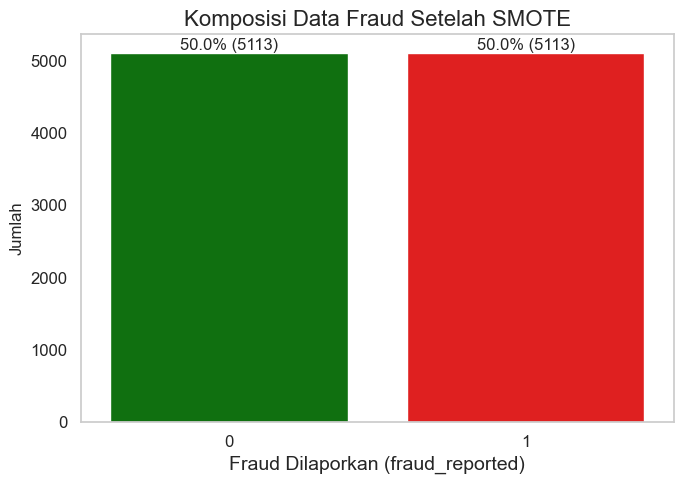

In [ ]:
# Menampilkan Komposisi data fraud setelah SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame hasil SMOTE dengan kolom fraud_reported
df_resampled = pd.DataFrame({'fraud_reported': y_smote.astype(str)})

plt.figure(figsize=(7, 5))

# Sesuaikan palette dengan nilai '0' dan '1'
palette = {'0': 'green', '1': 'red'}

ax = sns.countplot(
    data=df_resampled,
    x='fraud_reported',
    hue='fraud_reported',
    palette=palette,
    dodge=False,
    legend=False
)

plt.xticks(size=12)
plt.xlabel('Fraud Dilaporkan (fraud_reported)', size=14)
plt.yticks(size=12)
plt.ylabel('Jumlah', size=12)
plt.title("Komposisi Data Fraud Setelah SMOTE", size=16)

# Tambahkan persentase + jumlah di atas tiap batang
total = len(df_resampled)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f'{percentage:.1f}% ({count})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)

# Hilangkan grid horizontal
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

# PIPELINE
- Decision Tree
- Random Forest
- XGBoost
- Surrogate XGBoost
- XGBoost Depth 2

## DECISION TREE

### Model

In [ ]:
# Model

# Training Decision Tree

param_dt = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create pipelines with SMOTE for each model (nested GridSearchCV)
dt_grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_dt, scoring='roc_auc', cv=5)

dt_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', dt_grid)
])

dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Week', 'Age',
                                                   'months_as_customer',
                                                   'policy_deductable',
                                                   'Above_Below_50K',
                                                   'policy_annual_premium',
                                                   'capital_gains',
                                                   'capital_loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_...
                                                   'incident_type', 'auto_make',
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy'),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Decision Tree

import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="dt9_full_pipeline", models_dir="dt9_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(dt_pipeline, x_train, y_train):
saved_path_dt9 = save_full_pipeline(dt_pipeline, model_name="dt9_gridsearch_full")


✅ Full pipeline saved to: dt9_models/dt9_gridsearch_full_20250617_145444.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Decision Tree
import joblib

# Load seluruh pipeline
loaded_pipeline_dt9 = joblib.load(saved_path_dt9)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_dt9.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [112]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_dt9.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
400       0.182544      0.021130         0.003197        0.000400   
401       0.174742      0.020194         0.003991        0.000925   
402       0.171611      0.019278         0.002818        0.000371   
403       0.176458      0.020567         0.003396        0.000519   
301       0.152300      0.010797         0.002584        0.000472   
..             ...           ...              ...             ...   
95        0.077044      0.006439         0.002399        0.000491   
96        0.076615      0.007262         0.002983        0.000633   
97        0.076885      0.007304         0.002788        0.000717   
99        0.077439      0.004752         0.002801        0.000740   
98        0.075212      0.001488         0.002776        0.000716   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
400               9                     50                      50   
401               9                     50                     100   
402               9                     50                     150   
403               9                     50                     200   
301               8                     50                     100   
..              ...                    ...                     ...   
95                5                    500                     300   
96                5                    500                     350   
97                5                    500                     400   
99                5                    500                     500   
98                5                    500                     450   

                                                params  split0_test_score  \
400  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.896789   
401  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.896502   
402  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.897183   
403  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.892712   
301  {'max_depth': 8, 'min_samples_leaf': 50, 'min_...           0.880870   
..                                                 ...                ...   
95   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
96   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
97   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
99   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
98   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   

     split1_test_score  split2_test_score  split3_test_score  \
400           0.911107           0.916346           0.932967   
401           0.911107           0.916343           0.932967   
402           0.909921           0.908887           0.929342   
403           0.905361           0.903281           0.924238   
301           0.893865           0.902420           0.918483   
..                 ...                ...                ...   
95            0.826039           0.841548           0.868595   
96            0.826039           0.841548           0.868595   
97            0.826039           0.841548           0.868595   
99            0.826039           0.841548           0.868595   
98            0.826039           0.841548           0.868595   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
400           0.932259         0.917894        0.013619                1  
401           0.932470         0.917878        0.013753                2  
402           0.926927         0.914452        0.012059                3  
403           0.924486         0.910016        0.012475                4  
301           0.918296         0.902787        0.014470                5  
..                 ...              ...             ...              ...  
95            0.854975         0.840250        0.020655              491  
96            0.854975         0.840250  

**Menampilkan Rules dan Tree**

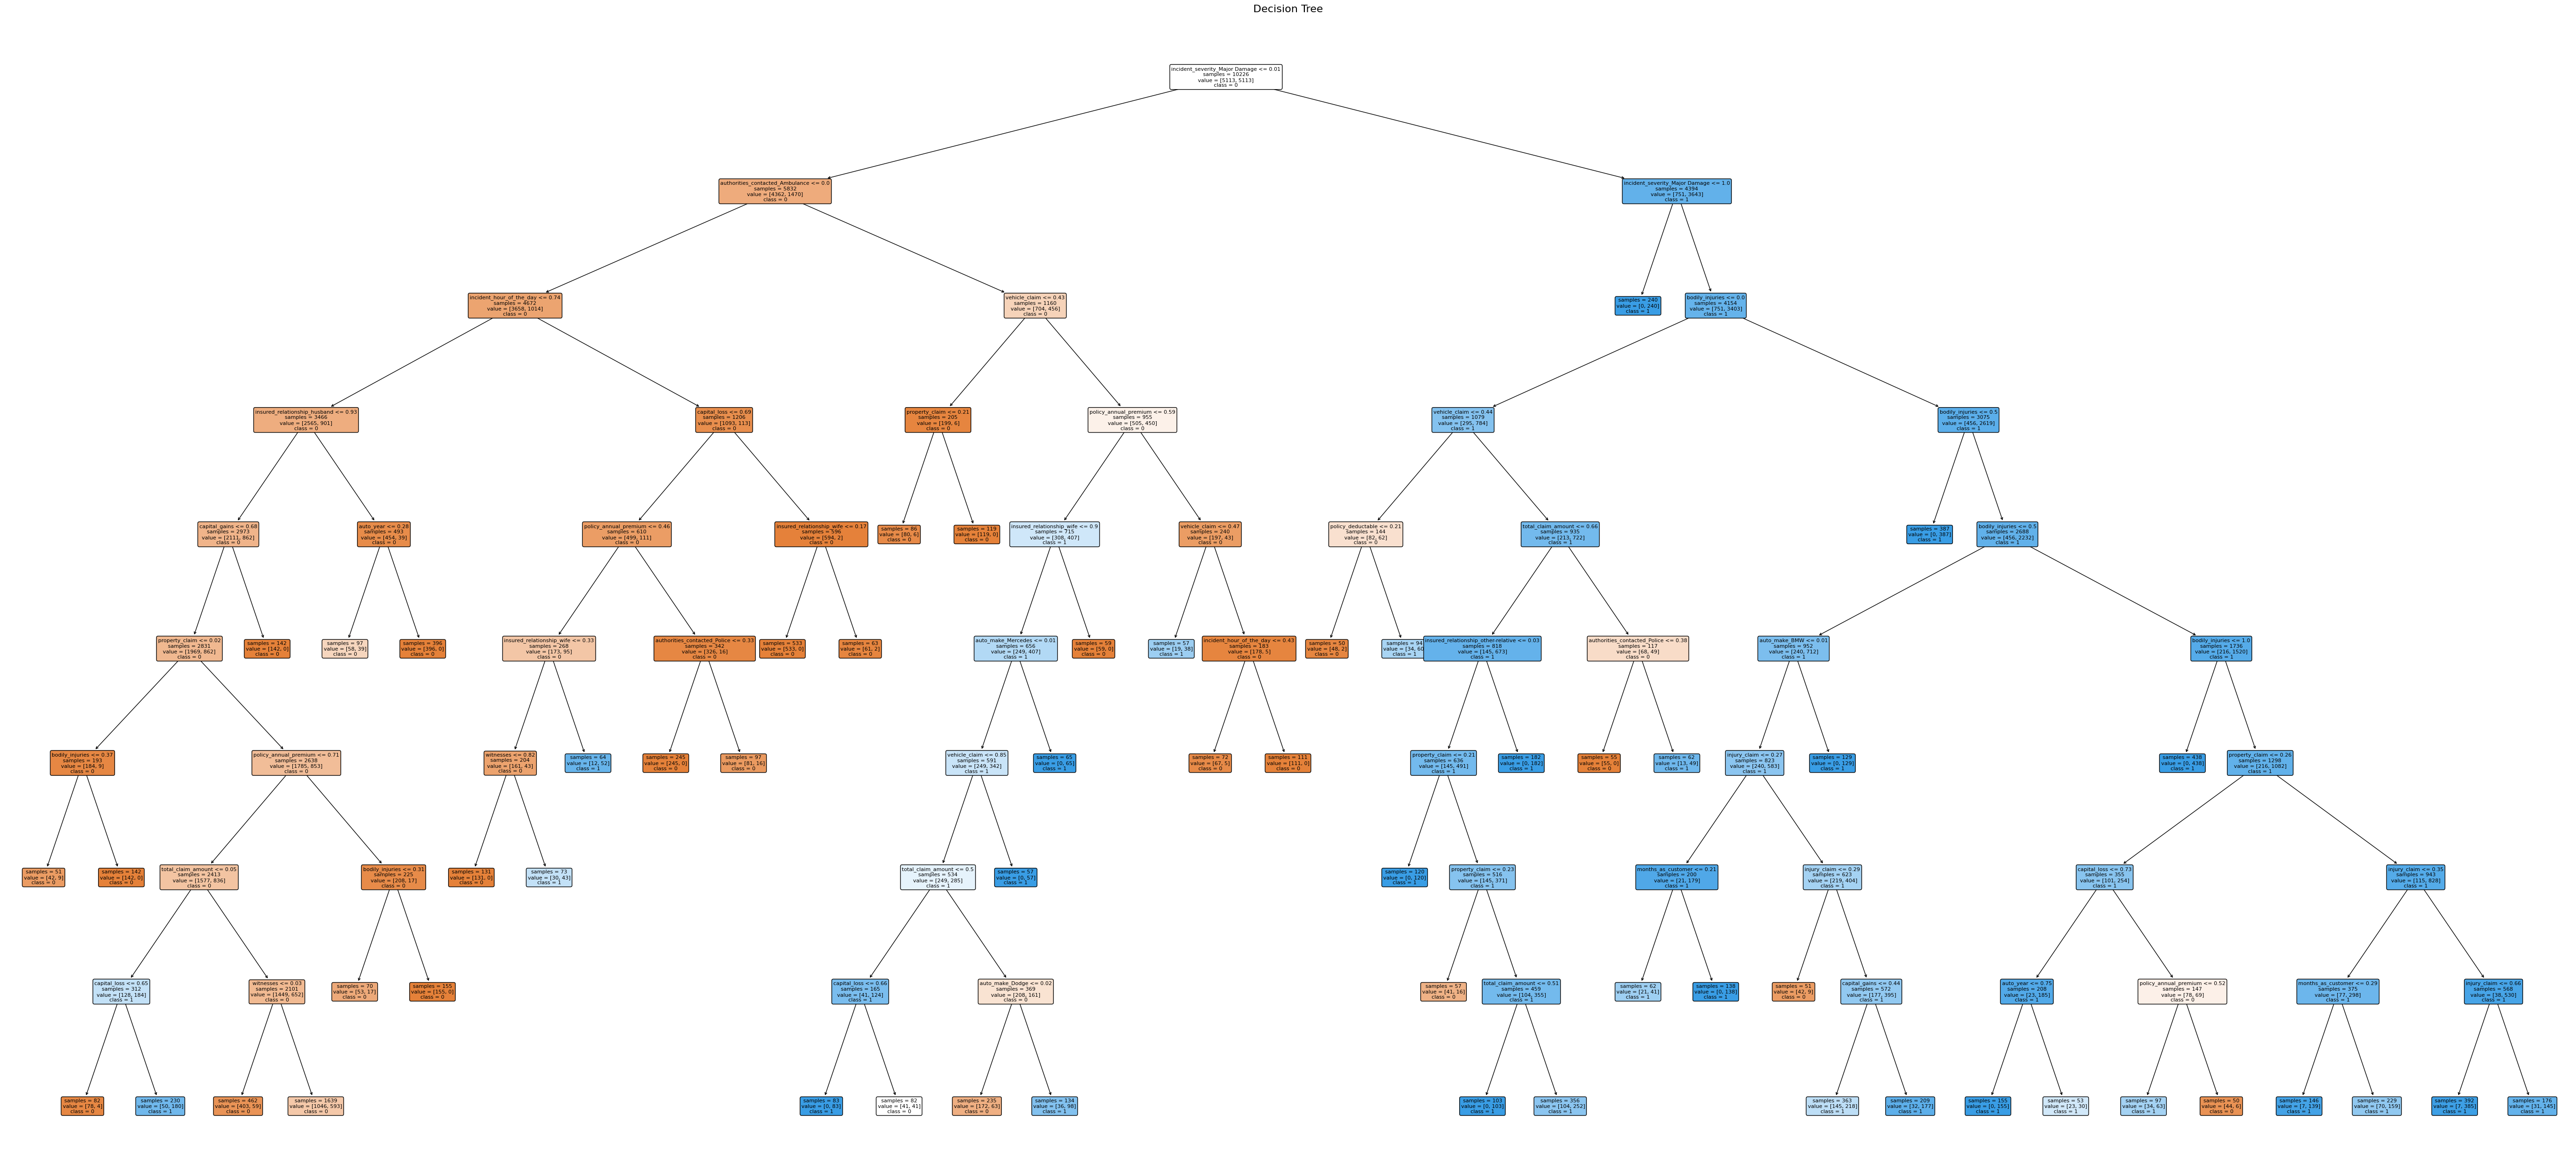


=== FULL RULE SET  ===

|-- incident_severity_Major Damage <= 0.0105
|  |-- authorities_contacted_Ambulance <= 0.0034
|  |  |-- incident_hour_of_the_day <= 0.7385
|  |  |  |-- insured_relationship_husband <= 0.9304
|  |  |  |  |-- capital_gains <= 0.6826
|  |  |  |  |  |-- property_claim <= 0.0190
|  |  |  |  |  |  |-- bodily_injuries <= 0.3713
|  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |-- bodily_injuries >  0.3713
|  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |-- property_claim >  0.0190
|  |  |  |  |  |  |-- policy_annual_premium <= 0.7107
|  |  |  |  |  |  |  |-- total_claim_amount <= 0.0455
|  |  |  |  |  |  |  |  |-- capital_loss <= 0.6526
|  |  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |  |  |-- capital_loss >  0.6526
|  |  |  |  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |  |  |-- total_claim_amount >  0.0455
|  |  |  |  |  |  |  |  |-- witnesses <= 0.0252
|  |  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |  |  |-- witnesses >  0.0252
|  |  |  |  

In [ ]:
# Menampilkan Tree dan Full Rule Set Decision Tree

import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# 1) Muat pipeline & ambil model terbaik
pipeline      = joblib.load(saved_path_dt9)
dt_pipeline   = pipeline.named_steps['grid_search'].best_estimator_
if hasattr(dt_pipeline, 'named_steps'):
    dt = dt_pipeline.named_steps['model']
else:
    dt = dt_pipeline

# 2) Ambil dan bersihkan nama fitur
raw_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
feature_names = [n.split('__',1)[-1] for n in raw_names]

# 3) Visualisasi full‐depth tree
plt.figure(figsize=(55, 25))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=[str(c) for c in dt.classes_],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=None,     # tampilkan semua level
    label='all',        # tampilkan split + samples + value + class di leaf
    impurity=False,     # hilangkan impurity
    proportion=False,   # tampilkan counts (samples), bukan proporsi
    precision=2         # presisi angka threshold
)
plt.title("Decision Tree", fontsize=16, pad=12)
plt.tight_layout()
plt.savefig("dt9_tree.png", dpi=300, bbox_inches="tight")
plt.show()

# 4) Cetak aturan lengkap tanpa weights
rules = export_text(
    dt,
    feature_names=feature_names,
    show_weights=False,  # hilangkan counts di rules
    spacing=2,
    decimals=4
)
print("\n=== FULL RULE SET  ===\n")
print(rules)



### Statistical Performances

In [ ]:
# Statistik Performa Decision Tree

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_dt9.predict(x_test)
y_prob = loaded_pipeline_dt9.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1265
           1       0.69      0.80      0.74       428

    accuracy                           0.86      1693
   macro avg       0.81      0.84      0.82      1693
weighted avg       0.87      0.86      0.86      1693



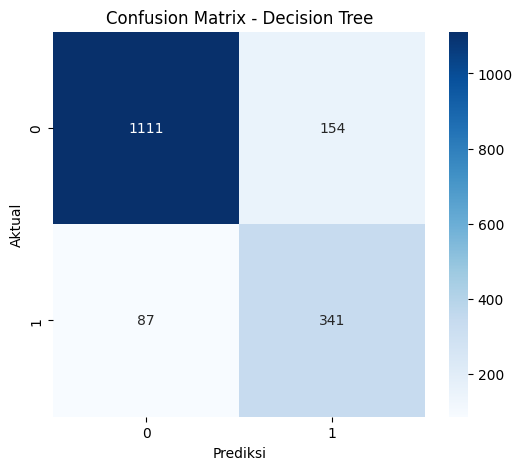

In [ ]:
# Confusion Matris Decision Tree

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_dt9.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Decision Tree

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_dt9)
preprocessor = pipeline.named_steps['preprocessing']
dt           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = dt.predict_proba(X_test_enc)[:, 1]
y_pred = dt.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.9127
Sensitivity   : 0.7967
Specificity   : 0.8783


<Figure size 800x600 with 0 Axes>

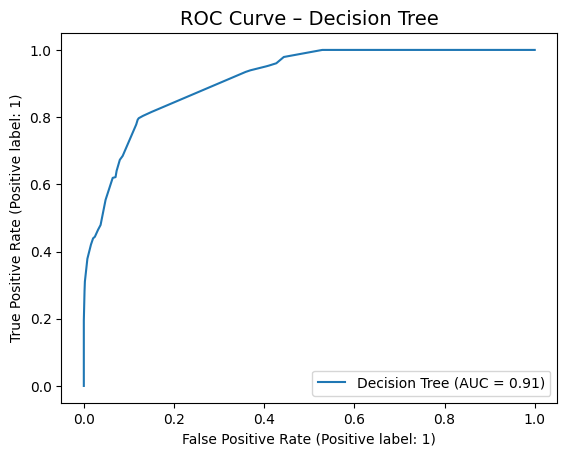

In [ ]:
# ROC Curve Decision Tree

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_dt9.named_steps['preprocessing']
grid_search  = loaded_pipeline_dt9.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Decision Tree",
    pos_label=1
)
plt.title("ROC Curve – Decision Tree", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x Decision Tree

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_dt9)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang DecisionTreeClassifier pakai best_params
    model_dt = DecisionTreeClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_dt)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  2  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  3  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  4  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  5  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  6  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  7  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  8  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  9  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration 10  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.9127 ± 0.0000
Specificity : 0.8783 ± 0.0000
Sensitivity : 0.7967 ± 0.0000


## RANDOM FOREST

### Model

In [ ]:
# Training Model Random Forest

param_rf = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=250,
                                              criterion='entropy',
                                              n_jobs=-1),
                       param_grid=param_rf, scoring='roc_auc',cv=5)

rf_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', rf_grid)
])

rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Week', 'Age',
                                                   'months_as_customer',
                                                   'policy_deductable',
                                                   'Above_Below_50K',
                                                   'policy_annual_premium',
                                                   'capital_gains',
                                                   'capital_loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_...
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(criterion='entropy',
                                                               n_estimators=250,
                                                               n_jobs=-1),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Random Forest 
import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="rf9_full_pipeline", models_dir="rf9_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(rf_pipeline, x_train, y_train):
saved_path_rf9 = save_full_pipeline(rf_pipeline, model_name="rf9_gridsearch_full")


✅ Full pipeline saved to: rf9_models/rf9_gridsearch_full_20250617_160312.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Random Forest
import joblib

# Load seluruh pipeline
loaded_pipeline_rf9 = joblib.load(saved_path_rf9)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_rf9.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [122]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_rf9.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
401       2.071986      0.210874         0.128855        0.013380   
400       2.070294      0.113093         0.128695        0.014068   
301       1.867517      0.117904         0.115054        0.006016   
300       2.078003      0.211287         0.140453        0.015219   
402       2.104965      0.240716         0.123154        0.019018   
..             ...           ...              ...             ...   
96        1.274391      0.115223         0.229890        0.025905   
93        1.214181      0.102909         0.222541        0.013921   
394       1.369808      0.186409         0.147299        0.021007   
391       1.137409      0.050246         0.112102        0.000586   
292       1.195684      0.122129         0.118690        0.013076   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
401               9                     50                     100   
400               9                     50                      50   
301               8                     50                     100   
300               8                     50                      50   
402               9                     50                     150   
..              ...                    ...                     ...   
96                5                    500                     350   
93                5                    500                     200   
394               8                    500                     250   
391               8                    500                     100   
292               7                    500                     150   

                                                params  split0_test_score  \
401  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.919107   
400  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.915920   
301  {'max_depth': 8, 'min_samples_leaf': 50, 'min_...           0.914263   
300  {'max_depth': 8, 'min_samples_leaf': 50, 'min_...           0.914228   
402  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.913410   
..                                                 ...                ...   
96   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.796386   
93   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.797271   
394  {'max_depth': 8, 'min_samples_leaf': 500, 'min...           0.795982   
391  {'max_depth': 8, 'min_samples_leaf': 500, 'min...           0.797031   
292  {'max_depth': 7, 'min_samples_leaf': 500, 'min...           0.796786   

     split1_test_score  split2_test_score  split3_test_score  \
401           0.939831           0.946354           0.963691   
400           0.938595           0.947706           0.963511   
301           0.936084           0.945571           0.962654   
300           0.935474           0.945998           0.962653   
402           0.934890           0.945449           0.962348   
..                 ...                ...                ...   
96            0.825800           0.851568           0.875927   
93            0.824633           0.848937           0.882000   
394           0.820546           0.852352           0.879001   
391           0.825838           0.850721           0.878650   
292           0.822747           0.851994           0.877230   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
401           0.958059         0.945408        0.015608                1  
400           0.958504         0.944847        0.016846                2  
301           0.956926         0.943100        0.017091                3  
300           0.956891         0.943049        0.017162                4  
402           0.956735         0.942566        0.017375                5  
..                 ...              ...             ...              ...  
96            0.864845         0.842905        0.028648              496  
93            0.861470         0.842862  

### Statistical Performances

In [ ]:
# Statistik Performa Random Forest

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_rf9.predict(x_test)
y_prob = loaded_pipeline_rf9.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1265
           1       0.64      0.72      0.68       428

    accuracy                           0.83      1693
   macro avg       0.77      0.79      0.78      1693
weighted avg       0.84      0.83      0.83      1693



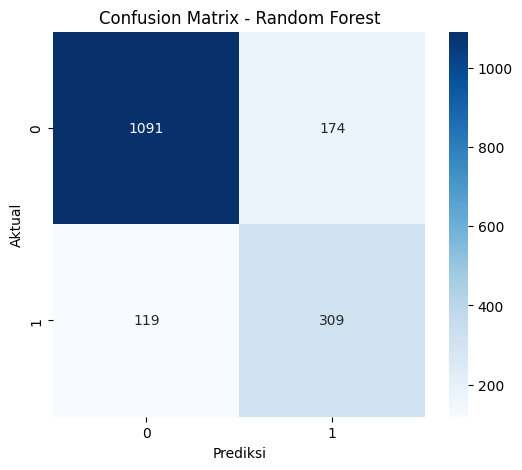

In [ ]:
# Confusion Matrix Random Forest

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_rf9.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Random Forest

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_rf9)
preprocessor = pipeline.named_steps['preprocessing']
rf           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = rf.predict_proba(X_test_enc)[:, 1]
y_pred = rf.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.9392
Sensitivity   : 0.7220
Specificity   : 0.8625


<Figure size 800x600 with 0 Axes>

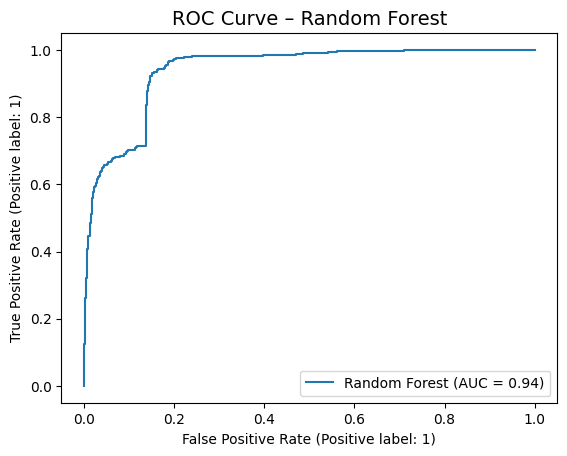

In [ ]:
# ROC Curve Random Forest

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_rf9.named_steps['preprocessing']
grid_search  = loaded_pipeline_rf9.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Random Forest",
    pos_label=1
)
plt.title("ROC Curve – Random Forest", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x Random Forest

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_rf9)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang RandomForestClassifier pakai best_params
    model_rf = RandomForestClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_rf)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.9392,  Spec: 0.8625,  Sens: 0.7266
Iteration  2  —  ROC AUC: 0.9360,  Spec: 0.8625,  Sens: 0.7196
Iteration  3  —  ROC AUC: 0.9367,  Spec: 0.8625,  Sens: 0.7173
Iteration  4  —  ROC AUC: 0.9332,  Spec: 0.8625,  Sens: 0.7173
Iteration  5  —  ROC AUC: 0.9383,  Spec: 0.8625,  Sens: 0.7196
Iteration  6  —  ROC AUC: 0.9360,  Spec: 0.8625,  Sens: 0.7173
Iteration  7  —  ROC AUC: 0.9375,  Spec: 0.8625,  Sens: 0.7173
Iteration  8  —  ROC AUC: 0.9356,  Spec: 0.8625,  Sens: 0.7173
Iteration  9  —  ROC AUC: 0.9378,  Spec: 0.8625,  Sens: 0.7220
Iteration 10  —  ROC AUC: 0.9366,  Spec: 0.8625,  Sens: 0.7243

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.9367 ± 0.0017
Specificity : 0.8625 ± 0.0000
Sensitivity : 0.7199 ± 0.0034


## XGBOOST

### Model

In [ ]:
# Training Model XGBoost
param_xgb = {'max_depth': np.arange(5, 10),
             'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
             'gamma': [0, 0.1, 1, 3, 5],
             'lambda': [0, 0.1, 0.2, 1, 5]}

xgb_grid = GridSearchCV(XGBClassifier(n_estimators=250,
                                      subsample=0.8,
                                      objective='binary:logistic',
                                      eval_metric='logloss'),
                        param_grid=param_xgb, cv=5, scoring ='roc_auc', n_jobs=-1)

xgb_pipeline = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('grid_search', xgb_grid)])

xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Week', 'Age',
                                                   'months_as_customer',
                                                   'policy_deductable',
                                                   'Above_Below_50K',
                                                   'policy_annual_premium',
                                                   'capital_gains',
                                                   'capital_loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=250,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': [0, 0.1, 1, 3, 5],
                                          'lambda': [0, 0.1, 0.2, 1, 5],
                                          'max_depth': array([5, 6, 7, 8, 9])},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model XGBoost
import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="xgb9_full_pipeline", models_dir="xgb9_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(xgb9_pipeline, x_train, y_train):
saved_path_xgb9 = save_full_pipeline(xgb_pipeline, model_name="xgb9_gridsearch_full")


✅ Full pipeline saved to: xgb9_models/xgb9_gridsearch_full_20250617_175256.pkl


In [ ]:
# Menampilkan hyperparameter terbaik XGBoost
import joblib

# Load seluruh pipeline
loaded_pipeline_xgb9 = joblib.load(saved_path_xgb9)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_xgb9.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'eta': 0.05, 'gamma': 0, 'lambda': 0.1, 'max_depth': 8}


In [133]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_xgb9.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
385      10.551948      0.439467         0.076869        0.006399      0.15   
379      16.463848      0.591976         0.109001        0.003637      0.15   
410      10.809845      0.480891         0.073874        0.004313      0.15   
505       6.413836      0.618498         0.041201        0.003369       0.2   
384      15.481744      0.750059         0.121211        0.020736      0.15   
..             ...           ...              ...             ...       ...   
70       13.683266      0.919541         0.070510        0.001785      0.01   
45        9.340583      0.390159         0.048643        0.003976      0.01   
20        9.533311      0.884095         0.054482        0.006959      0.01   
95       13.906139      0.550422         0.075120        0.006130      0.01   
120      13.785526      0.552081         0.072801        0.003060      0.01   

    param_gamma param_lambda param_max_depth  \
385           0          0.2               5   
379           0            0               9   
410         0.1          0.2               5   
505           0          0.1               5   
384           0          0.1               9   
..          ...          ...             ...   
70            1            5               5   
45          0.1            5               5   
20            0            5               5   
95            3            5               5   
120           5            5               5   

                                                params  split0_test_score  \
385  {'eta': 0.15, 'gamma': 0, 'lambda': 0.2, 'max_...           1.000000   
379  {'eta': 0.15, 'gamma': 0, 'lambda': 0, 'max_de...           1.000000   
410  {'eta': 0.15, 'gamma': 0.1, 'lambda': 0.2, 'ma...           1.000000   
505  {'eta': 0.2, 'gamma': 0, 'lambda': 0.1, 'max_d...           1.000000   
384  {'eta': 0.15, 'gamma': 0, 'lambda': 0.1, 'max_...           1.000000   
..                                                 ...                ...   
70   {'eta': 0.01, 'gamma': 1, 'lambda': 5, 'max_de...           0.927278   
45   {'eta': 0.01, 'gamma': 0.1, 'lambda': 5, 'max_...           0.927032   
20   {'eta': 0.01, 'gamma': 0, 'lambda': 5, 'max_de...           0.927032   
95   {'eta': 0.01, 'gamma': 3, 'lambda': 5, 'max_de...           0.926145   
120  {'eta': 0.01, 'gamma': 5, 'lambda': 5, 'max_de...           0.925876   

     split1_test_score  split2_test_score  split3_test_score  \
385           1.000000           1.000000           1.000000   
379           1.000000           1.000000           1.000000   
410           1.000000           1.000000           1.000000   
505           1.000000           1.000000           1.000000   
384           1.000000           1.000000           1.000000   
..                 ...                ...                ...   
70            0.951177           0.962076           0.976724   
45            0.951521           0.961985           0.976882   
20            0.951610           0.961943           0.976859   
95            0.950154           0.961744           0.976557   
120           0.949112           0.961891           0.976689   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
385           1.000000         1.000000        0.000000                1  
379           1.000000         1.000000        0.000000                1  
410           1.000000         1.000000        0.000000                1  
505           1.000000         1.000000        0.000000                1  
384           1.000000         1.000000        0.000000                1  
..                 ...              ...             ...              ...  
70            0.972037         0.957858        0.017633              621  
45            0.971868         0.957858        0.017695              622  
20            0.971809         0.957851        0.017673              623  
95            0.971899         0.95

### Statistical Performances

In [ ]:
# Statistik Performa XGBoost

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_xgb9.predict(x_test)
y_prob = loaded_pipeline_xgb9.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       1.00      1.00      1.00       428

    accuracy                           1.00      1693
   macro avg       1.00      1.00      1.00      1693
weighted avg       1.00      1.00      1.00      1693



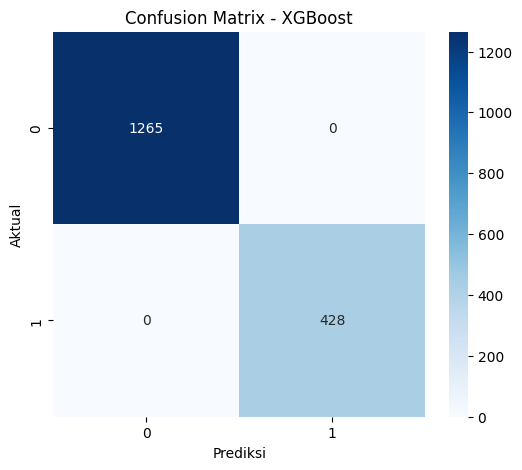

In [ ]:
# Confusion Matrix XGBoost

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_xgb9.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity XGBoost

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_xgb9)
preprocessor = pipeline.named_steps['preprocessing']
xgb           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = xgb.predict_proba(X_test_enc)[:, 1]
y_pred = xgb.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 1.0000
Sensitivity   : 1.0000
Specificity   : 1.0000


<Figure size 800x600 with 0 Axes>

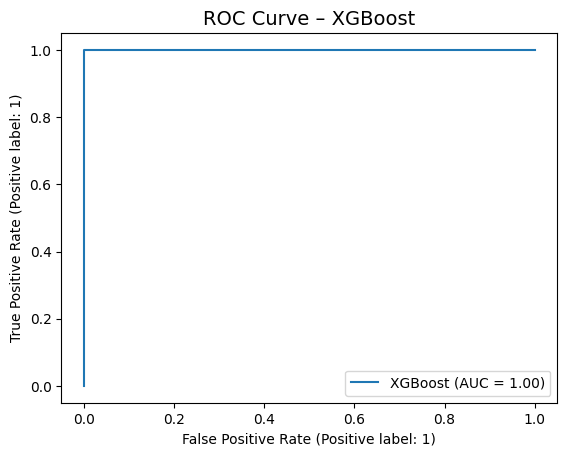

In [ ]:
# ROC Curve XGBoost

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_xgb9.named_steps['preprocessing']
grid_search  = loaded_pipeline_xgb9.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="XGBoost",
    pos_label=1
)
plt.title("ROC Curve – XGBoost", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x XGBoost

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_xgb9)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang XGBClassifier pakai best_params
    model_xgb = XGBClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_xgb)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  1  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  2  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  3  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  4  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  5  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  6  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  7  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  8  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  9  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration 10  —  ROC AUC: 1.0000,  Spec: 1.0000,  Sens: 0.9953

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 1.0000 ± 0.0000
Specificity : 1.0000 ± 0.0000
Sensitivity : 0.9953 ± 0.0000


## SURROGATE XGBOOST

In [ ]:
# Menetapkan prediksi XGBoost sebagai y_train Surrogate XGBoost
import joblib
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load kembali full‐pipeline XGBoost Anda
#    (preprocessing + SMOTE + GridSearchCV)
xgb_full = joblib.load(saved_path_xgb9)

# Ambil GridSearchCV dan best estimator (XGBClassifier)
gs = xgb_full.named_steps['grid_search']
best_xgb: XGBClassifier = gs.best_estimator_

# Siapkan inference‐pipeline tanpa SMOTE:
#    hanya preprocessing + best_xgb
infer_xgb = Pipeline([
    ('preprocessing', xgb_full.named_steps['preprocessing']),
    ('model',          best_xgb)
])

# Hitung prediksi XGB sebagai target surrogate:
#    a) hard labels
y_surr = infer_xgb.predict(x_train)

In [ ]:
# Training Model Surrogate XGBoost
param_sxgb = {'max_depth': np.arange(5, 10), 
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create pipelines with SMOTE for each model (nested GridSearchCV)
sxgb_grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_sxgb, scoring='roc_auc', cv=5) 

sxgb_pipeline = ImbPipeline([ 
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', sxgb_grid) 
])

sxgb_pipeline.fit(x_train, y_surr)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Week', 'Age',
                                                   'months_as_customer',
                                                   'policy_deductable',
                                                   'Above_Below_50K',
                                                   'policy_annual_premium',
                                                   'capital_gains',
                                                   'capital_loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_...
                                                   'incident_type', 'auto_make',
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy'),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Surrogate XGBoost
import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="sxgb9_full_pipeline", models_dir="sxgb9_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(sxgb_pipeline, x_train, y_train):
saved_path_sxgb9 = save_full_pipeline(sxgb_pipeline, model_name="sxgb9_gridsearch_full")


✅ Full pipeline saved to: sxgb9_models/sxgb9_gridsearch_full_20250617_182129.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Surrogate XGBoost
import joblib

# Load seluruh pipeline
loaded_pipeline_sxgb9 = joblib.load(saved_path_sxgb9)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_sxgb9.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [143]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_sxgb9.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
401       0.242080      0.025316         0.002987        0.000603   
400       0.196086      0.039547         0.003390        0.000505   
402       0.227202      0.042076         0.004205        0.001167   
403       0.217874      0.033183         0.003402        0.000802   
301       0.196192      0.035080         0.003389        0.000509   
..             ...           ...              ...             ...   
95        0.111016      0.019788         0.003784        0.000769   
96        0.107764      0.012889         0.003786        0.000745   
97        0.102809      0.012115         0.004375        0.001058   
99        0.107617      0.017005         0.003876        0.000298   
98        0.100998      0.011130         0.004000        0.000634   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
401               9                     50                     100   
400               9                     50                      50   
402               9                     50                     150   
403               9                     50                     200   
301               8                     50                     100   
..              ...                    ...                     ...   
95                5                    500                     300   
96                5                    500                     350   
97                5                    500                     400   
99                5                    500                     500   
98                5                    500                     450   

                                                params  split0_test_score  \
401  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.896789   
400  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.896522   
402  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.897183   
403  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.892712   
301  {'max_depth': 8, 'min_samples_leaf': 50, 'min_...           0.880870   
..                                                 ...                ...   
95   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
96   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
97   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
99   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   
98   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.810095   

     split1_test_score  split2_test_score  split3_test_score  \
401           0.911107           0.918217           0.932967   
400           0.910854           0.918215           0.932967   
402           0.909699           0.908887           0.929342   
403           0.905361           0.903281           0.924238   
301           0.893865           0.902415           0.918483   
..                 ...                ...                ...   
95            0.826039           0.841548           0.868595   
96            0.826039           0.841548           0.868595   
97            0.826039           0.841548           0.868595   
99            0.826039           0.841548           0.868595   
98            0.826039           0.841548           0.868595   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
401           0.932259         0.918268        0.013597                1  
400           0.932470         0.918206        0.013752                2  
402           0.926927         0.914408        0.012076                3  
403           0.924486         0.910016        0.012475                4  
301           0.918296         0.902786        0.014470                5  
..                 ...              ...             ...              ...  
95            0.854975         0.840250        0.020655              491  
96            0.854975         0.840250  

**Menampilkan Rules dan Tree**

Model yang akan diplot: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Pohon disimpan di: surrogate_xgboost_9_tree_large.png


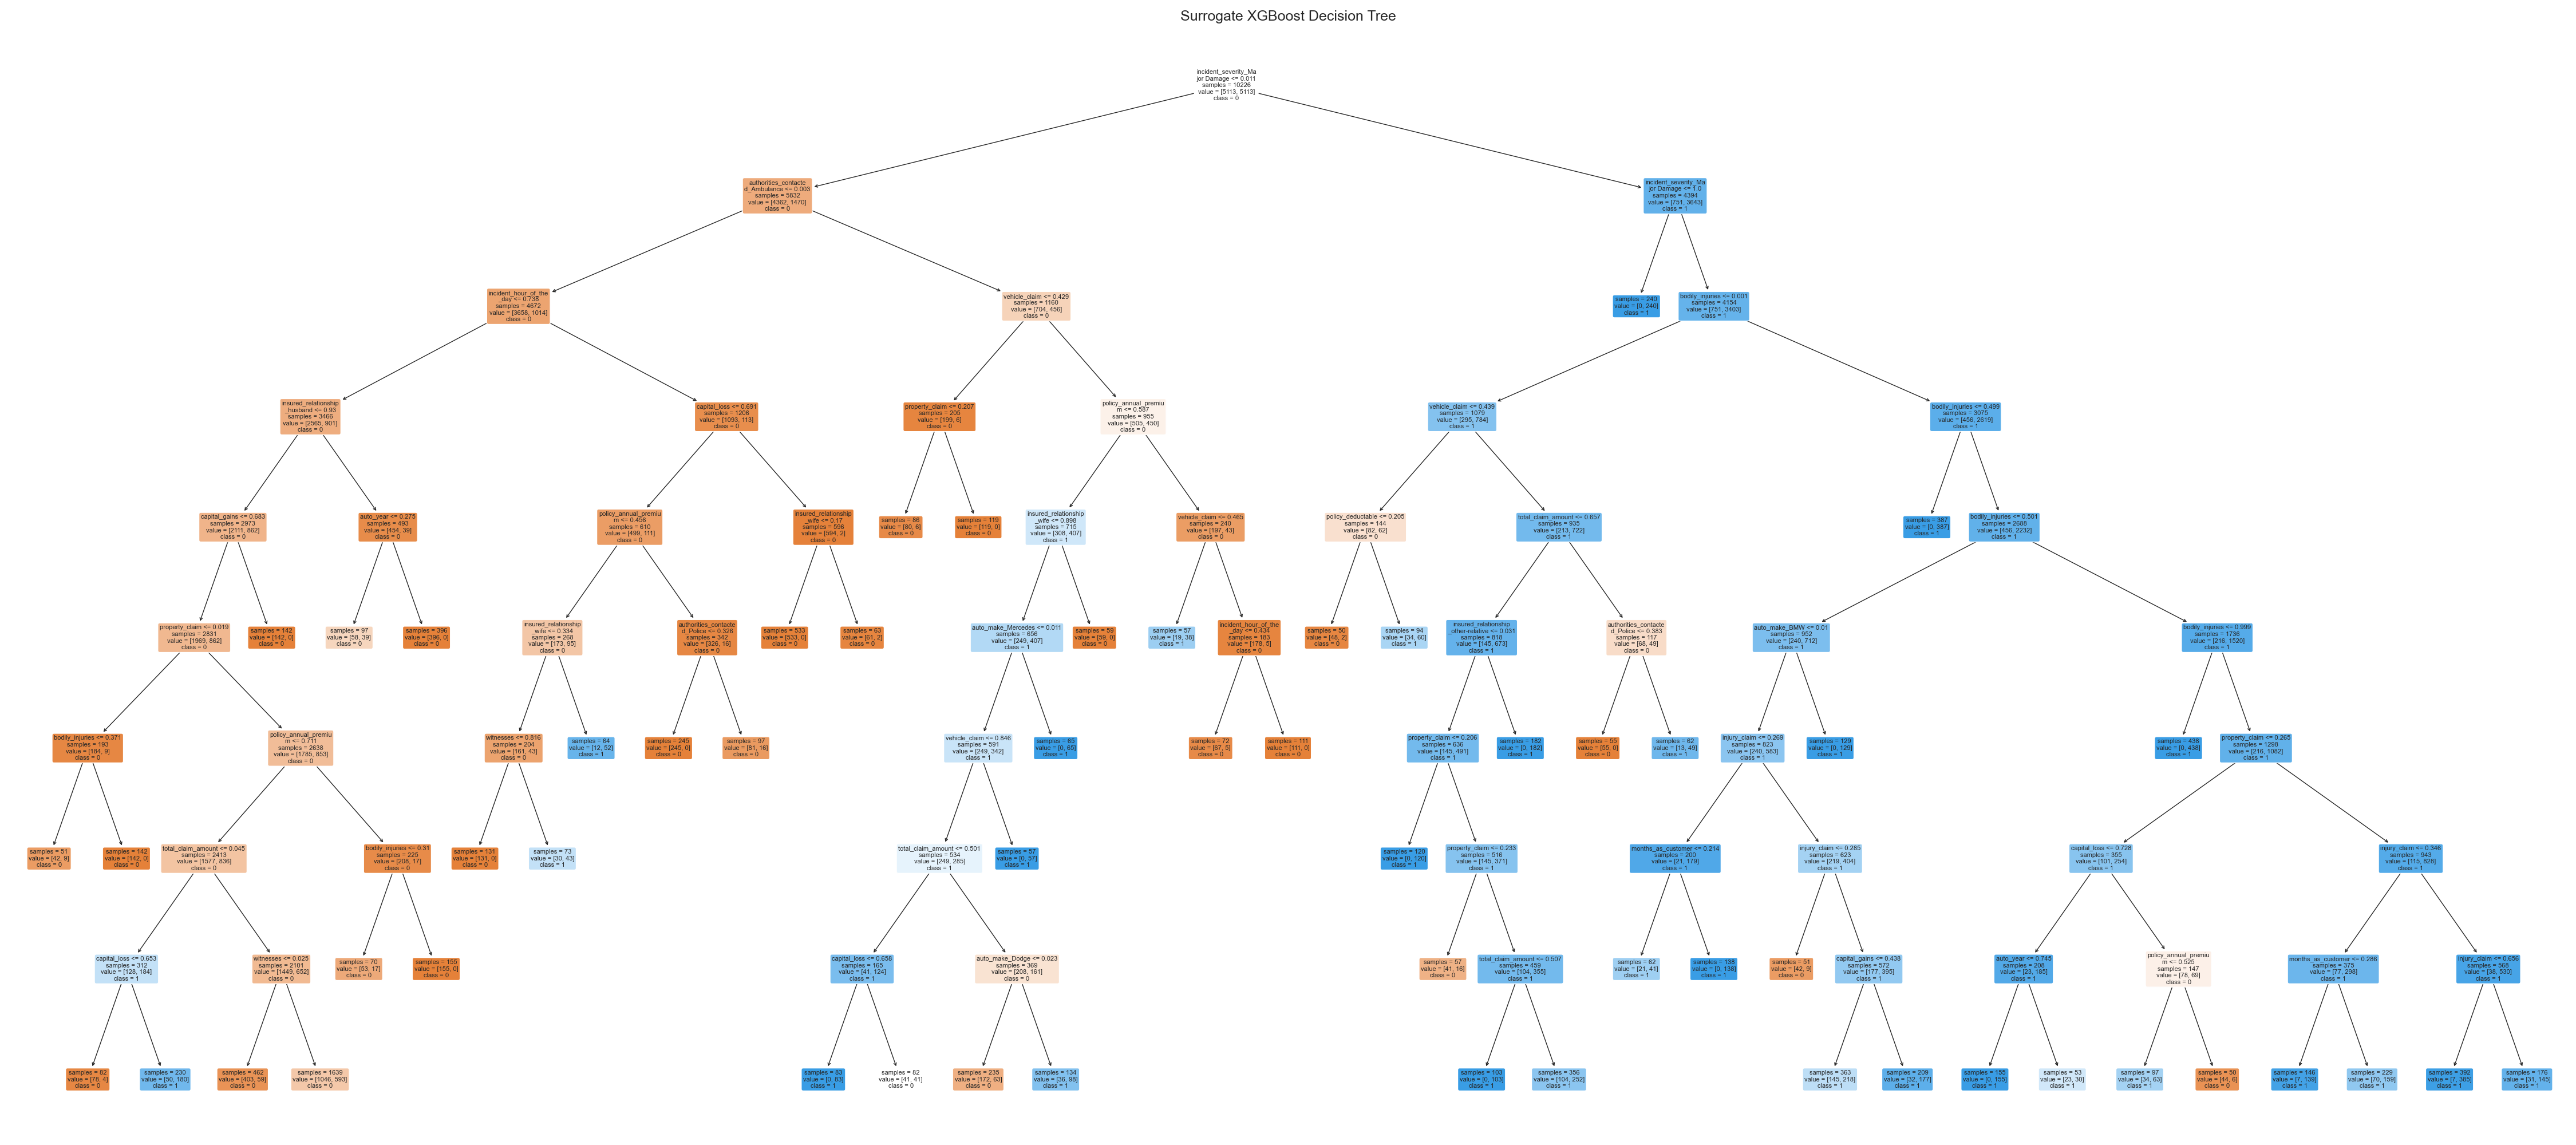

In [ ]:
# Menampilkan Tree dan Full Rule Set Surrogate XGBoost
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
import textwrap

# ---------------------------
# 1) Muat pipeline & extract model DecisionTreeClassifier
# ---------------------------

# Ganti dengan path yang sesuai:
saved_path = "sxgb9_models/sxgb9_gridsearch_full_20250617_182129.pkl"
pipeline = joblib.load(saved_path)

# Ambil estimator dari GridSearchCV / pipeline
if "grid_search" in pipeline.named_steps:
    gs = pipeline.named_steps["grid_search"]
    estimator = gs.best_estimator_
else:
    estimator = pipeline

# Jika estimator itu pipeline, coba unwrap step 'model' atau langsung DecisionTreeClassifier
if hasattr(estimator, "named_steps"):
    # misal step bernama 'model' atau 'estimator'
    if "model" in estimator.named_steps:
        model = estimator.named_steps["model"]
    elif "estimator" in estimator.named_steps:
        model = estimator.named_steps["estimator"]
    else:
        # Jika tidak ada step jelas, asumsikan pipeline akhir adalah DecisionTreeClassifier
        # Mungkin pipeline: preprocessing -> SMOTE -> classifier
        # Jika classifier di step terakhir:
        last_step = list(estimator.named_steps.keys())[-1]
        cand = estimator.named_steps[last_step]
        if isinstance(cand, DecisionTreeClassifier):
            model = cand
        else:
            model = cand  # gunakan apa adanya, meski bukan DecisionTreeClassifier
else:
    model = estimator

# Jika model masih wrapper, misal memiliki attribute estimator_
if not isinstance(model, DecisionTreeClassifier) and hasattr(model, "estimator_"):
    inner = getattr(model, "estimator_")
    if isinstance(inner, DecisionTreeClassifier):
        model = inner

print(f"Model yang akan diplot: {type(model)}")

# ---------------------------
# 2) Ambil nama fitur hasil preprocessing
# ---------------------------
feature_names = None
if "preprocessing" in pipeline.named_steps:
    preproc = pipeline.named_steps["preprocessing"]
    try:
        raw_names = preproc.get_feature_names_out()  # misal ['num__Age', 'cat__incident_severity_Major Damage', ...]
        # Bersihkan prefix 'num__' atau 'cat__'
        feature_names = [n.split("__", 1)[-1] for n in raw_names]
    except Exception as e:
        print("Peringatan: gagal ambil feature_names:", e)
        feature_names = None

if feature_names is None:
    # Jika gagal, Anda perlu mendefinisikan manual sesuai urutan kolom input model
    print("Warning: feature_names is None. Harap set manual list feature_names.")
    feature_names = None

# ---------------------------
# 3) Wrap nama fitur agar multi-line
# ---------------------------
def wrap_name(name, width=20):
    """
    Membungkus nama fitur menjadi beberapa baris maksimal width karakter per baris.
    Mengembalikan string multi-line '\n' jika perlu.
    """
    # textwrap.wrap akan memecah di spasi, underscore, dll.
    lines = textwrap.wrap(name, width=width)
    if not lines:
        return name
    return "\n".join(lines)

if feature_names is not None:
    # Atur width sesuai panjang rata-rata; misal 15–25 karakter
    feature_names_wrapped = [wrap_name(n, width=20) for n in feature_names]
else:
    feature_names_wrapped = None

# ---------------------------
# 4) Plot pohon
# ---------------------------
# Atur figsize besar untuk menghindari tabrakan:
fig_width = 45  # coba 30 atau lebih jika masih tabrakan
fig_height = 20  # tinggi menyesuaikan depth
plt.figure(figsize=(fig_width, fig_height))

plot_tree(
    model,
    feature_names=feature_names_wrapped,
    class_names=[str(c) for c in model.classes_] if hasattr(model, "classes_") else None,
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,
    label="all",
    fontsize=8,    # kecilkan font jika banyak node
    precision=3,   # presisi threshold
    # max_depth=None  # default None: tampilkan semua level
)

plt.title("Surrogate XGBoost Decision Tree", fontsize=18, pad=12)
plt.tight_layout()

# Jika ingin margin ekstra, bisa pakai plt.subplots_adjust:
# plt.subplots_adjust(left=0.01, right=0.99, top=0.9, bottom=0.1)

# Simpan ke file:
out_file = "surrogate_xgboost_9_tree_large.png"
plt.savefig(out_file, dpi=300, bbox_inches="tight")
print(f"Pohon disimpan di: {out_file}")

plt.show()

# ---------------------------
# 5) Jika masih tabrakan:
#   - Tambah fig_width jadi 40, 50; atau naikkan fig_height.
#   - Kecilkan fontsize menjadi 6 atau 7.
#   - Kurangi width wrap, misal width=15 agar baris lebih pendek.
#   - Pertimbangkan plot sebagian subtree dengan max_depth < full depth.
# ---------------------------


In [51]:
from sklearn.tree import export_text
rules = export_text(model, feature_names=feature_names, show_weights=False, spacing=2, decimals=4)
print(rules)


|-- incident_severity_Major Damage <= 0.0105
|  |-- authorities_contacted_Ambulance <= 0.0034
|  |  |-- incident_hour_of_the_day <= 0.7385
|  |  |  |-- insured_relationship_husband <= 0.9304
|  |  |  |  |-- capital_gains <= 0.6826
|  |  |  |  |  |-- property_claim <= 0.0190
|  |  |  |  |  |  |-- bodily_injuries <= 0.3713
|  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |-- bodily_injuries >  0.3713
|  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |-- property_claim >  0.0190
|  |  |  |  |  |  |-- policy_annual_premium <= 0.7107
|  |  |  |  |  |  |  |-- total_claim_amount <= 0.0455
|  |  |  |  |  |  |  |  |-- capital_loss <= 0.6526
|  |  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |  |  |-- capital_loss >  0.6526
|  |  |  |  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |  |  |-- total_claim_amount >  0.0455
|  |  |  |  |  |  |  |  |-- witnesses <= 0.0252
|  |  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |  |  |-- witnesses >  0.0252
|  |  |  |  |  |  |  |  |  |-- class:

In [58]:
import joblib
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 1) Muat pipeline dan ekstrak model DecisionTreeClassifier
pipeline = joblib.load("sxgb9_models/sxgb9_gridsearch_full_20250617_182129.pkl")
# ambil GridSearchCV → best_estimator_ → unwrap Pipeline → DecisionTreeClassifier
gs = pipeline.named_steps.get("grid_search")
est = gs.best_estimator_ if gs else pipeline
# jika masih Pipeline, ambil step 'model'
if hasattr(est, "named_steps"):
    model = est.named_steps.get("model", est)
else:
    model = est
# jika wrapped di estimator_, ambil .estimator_
if hasattr(model, "estimator_"):
    model = model.estimator_
assert isinstance(model, DecisionTreeClassifier), "Model bukan DecisionTreeClassifier"

# 2) Ambil semua transformer
preproc = pipeline.named_steps["preprocessing"]
num_pipe  = preproc.named_transformers_["num"]   # Pipeline(['scaler'])
ord_pipe  = preproc.named_transformers_["ord"]   # Pipeline(['ord_enc'])
cat_pipe  = preproc.named_transformers_["cat"]   # Pipeline(['ohe'])

scaler    = num_pipe.named_steps["scaler"]       # MinMaxScaler
ord_enc   = ord_pipe.named_steps["ord_enc"]      # OrdinalEncoder
ohe       = cat_pipe.named_steps["ohe"]          # OneHotEncoder

# 3) Siapkan mapping nama fitur hasil transform → informasi original
# a) Numerik
num_features = num_pipe.feature_names_in_  # urutan kolom numerik
mins, maxs    = scaler.data_min_, scaler.data_max_

# b) Ordinal
ord_feature  = ord_pipe.feature_names_in_[0]   # 'Education'
levels       = ord_enc.categories_[0]         # daftar level urutannya

# c) One-hot
cat_features_out = ohe.get_feature_names_out(cat_pipe.feature_names_in_)
# e.g. 'Work_Self-employed', kita split at '_' → feature='Work', category='Self-employed'

# 4) Loop over semua node split
tree = model.tree_
feature_names = preproc.get_feature_names_out()

def inv_minmax(val, idx):
    return val * (maxs[idx] - mins[idx]) + mins[idx]

for node in range(tree.node_count):
    feat_idx = tree.feature[node]
    thr      = tree.threshold[node]
    if feat_idx < 0:
        continue  # leaf

    feat_name = feature_names[feat_idx]

    # --- Numerik? ---
    if feat_name.startswith("num__"):
        orig = feat_name.split("__",1)[1]
        num_idx = list(num_features).index(orig)
        real_thr = inv_minmax(thr, num_idx)
        print(f"Node {node}: {orig} ≤ {real_thr:.3f}  (scaled {thr:.4f})")

    # --- Ordinal? ---
    elif feat_name.startswith("ord__"):
        # threshold val .5 berarti level ≤ k vs > k
        k = int(np.floor(thr + 1e-6))
        # level indices are 0-based in ord_enc
        if 0 <= k < len(levels):
            lvl = levels[k]
        else:
            lvl = f"unknown_idx={k}"
        print(f"Node {node}: {ord_feature} ≤ '{lvl}'  (encoded ≤ {thr:.1f})")

    # --- One-hot? ---
    elif feat_name.startswith("cat__"):
        # e.g. 'cat__Work_Self-employed'
        cat_full = feat_name.split("__",1)[1]
        # split into feature and category
        feat, cat = cat_full.split("_",1)
        # threshold ~0.5: branch left = 0 (category absent), right = 1 (present)
        which = "does not have" if thr >= 0.5 else "has"
        print(f"Node {node}: kategori '{feat}={cat}' {which} (thr={thr:.1f})")

    else:
        # fallback
        print(f"Node {node}: feature '{feat_name}' thr={thr:.4f}")


Node 0: kategori 'incident=severity_Major Damage' has (thr=0.0)
Node 1: kategori 'authorities=contacted_Ambulance' has (thr=0.0)
Node 2: incident_hour_of_the_day ≤ 16.985  (scaled 0.7385)
Node 3: kategori 'insured=relationship_husband' does not have (thr=0.9)
Node 4: capital_gains ≤ 68599.999  (scaled 0.6826)
Node 5: property_claim ≤ 450.078  (scaled 0.0190)
Node 6: bodily_injuries ≤ 0.743  (scaled 0.3713)
Node 9: policy_annual_premium ≤ 1580.585  (scaled 0.7107)
Node 10: total_claim_amount ≤ 5320.960  (scaled 0.0455)
Node 11: capital_loss ≤ -38600.002  (scaled 0.6526)
Node 14: witnesses ≤ 0.076  (scaled 0.0252)
Node 17: bodily_injuries ≤ 0.621  (scaled 0.3104)
Node 21: auto_year ≤ 2000.500  (scaled 0.2750)
Node 24: capital_loss ≤ -34300.003  (scaled 0.6913)
Node 25: policy_annual_premium ≤ 1169.617  (scaled 0.4561)
Node 26: kategori 'insured=relationship_wife' has (thr=0.3)
Node 27: witnesses ≤ 2.447  (scaled 0.8155)
Node 31: kategori 'authorities=contacted_Police' has (thr=0.3)
Node 

In [65]:
import joblib, re, numpy as np, textwrap
from sklearn.tree import export_text, DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1) MUAT PIPELINE & AMBIL DecisionTreeClassifier
saved_path = "sxgb9_models/sxgb9_gridsearch_full_20250617_182129.pkl"
pipeline: Pipeline = joblib.load(saved_path)

# Jika GridSearchCV di dalam pipeline:
if "grid_search" in pipeline.named_steps:
    model = pipeline.named_steps["grid_search"].best_estimator_
else:
    model = pipeline

# Jika masih Pipeline wrapper, cari step 'model' atau 'estimator'
if isinstance(model, Pipeline):
    for step in ("model", "estimator"):
        if step in model.named_steps:
            model = model.named_steps[step]
            break

# Jika ada .estimator_ (misal wrapped classifier), ambil itu
if not isinstance(model, DecisionTreeClassifier) and hasattr(model, "estimator_"):
    cand = model.estimator_
    if isinstance(cand, DecisionTreeClassifier):
        model = cand

print("Akan diplot model:", model)

# 2) AMBIL PREPROCESSOR & FEATURE NAMES
preproc: ColumnTransformer = pipeline.named_steps["preprocessing"]
# Dapatkan semua nama fitur pasca-preprocessing:
raw_names = preproc.get_feature_names_out()  
# Contoh: ['num__Age', 'num__policy_annual_premium', 'ord__Education', 'cat__Work_admin', ...]
feat_prefix, feat_name = zip(*(n.split("__",1) for n in raw_names))
feat_prefix = np.array(feat_prefix)
feat_name   = np.array(feat_name)

# 3) SIAPKAN INVERSI SCALE

# 3a) Numerik
scaler: MinMaxScaler = preproc.named_transformers_["num"].named_steps["scaler"]
num_ix = np.where(feat_prefix=="num")[0]
num_feats = feat_name[num_ix]
data_min  = scaler.data_min_
data_max  = scaler.data_max_

def inv_num(feat, thr):
    idx = list(num_feats).index(feat)
    return thr*(data_max[idx] - data_min[idx]) + data_min[idx]

# 3b) Ordinal
ord_enc: OrdinalEncoder = preproc.named_transformers_["ord"].named_steps["ord_enc"]
ord_ix = np.where(feat_prefix=="ord")[0]
ord_feats = feat_name[ord_ix]
ord_cats = ord_enc.categories_[0]  # list of original categories

def inv_ord(feat, thr):
    # bulat ke integer terdekat
    k = int(np.round(thr))
    k = max(0, min(k, len(ord_cats)-1))
    return ord_cats[k]

# 3c) One-Hot
cat_ix = np.where(feat_prefix=="cat")[0]
cat_feats = feat_name[cat_ix]

def inv_cat(feat, op):
    col,value = feat.split("_",1)
    if op=="<=":
        return f"{col} ≠ {value}"
    else:
        return f"{col} = {value}"

# 4) EXPORT & GANTI THRESHOLD
raw_rules = export_text(model, feature_names=list(feat_name), spacing=2, decimals=4)

pattern = re.compile(r"^(\s*\|[-\s]*)?([\w_]+)\s*(<=|>)\s*([0-9]+\.?[0-9]*)", re.MULTILINE)
def repl(m):
    indent, feat, op, thr = m.groups()
    thr = float(thr)
    if feat in num_feats:
        real = inv_num(feat, thr)
        new = f"{indent or ''}{feat} {op} {real:.3f}"
    elif feat in ord_feats:
        cat = inv_ord(feat, thr)
        new = f"{indent or ''}{feat} {op} kategori '{cat}'"
    elif feat in cat_feats:
        new = f"{indent or ''}{inv_cat(feat, op)}"
    else:
        return m.group(0)
    return new

pretty = pattern.sub(repl, raw_rules)

print("\n=== FULL RULE SET (threshold dalam NILAI ASLI) ===\n")
print(pretty)


Akan diplot model: DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=50,
                       min_samples_split=100)

=== FULL RULE SET (threshold dalam NILAI ASLI) ===

|-- incident_severity_Major Damage <= 0.0105
|  |-- authorities_contacted_Ambulance <= 0.0034
|  |  |-- incident_hour_of_the_day <= 0.7385
|  |  |  |-- insured_relationship_husband <= 0.9304
|  |  |  |  |-- capital_gains <= 0.6826
|  |  |  |  |  |-- property_claim <= 0.0190
|  |  |  |  |  |  |-- bodily_injuries <= 0.3713
|  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |-- bodily_injuries >  0.3713
|  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |-- property_claim >  0.0190
|  |  |  |  |  |  |-- policy_annual_premium <= 0.7107
|  |  |  |  |  |  |  |-- total_claim_amount <= 0.0455
|  |  |  |  |  |  |  |  |-- capital_loss <= 0.6526
|  |  |  |  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |  |  |  |-- capital_loss >  0.6526
|  |  |  |  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |  |  |-- total_

### Statistical Performances

In [ ]:
# Statistik Performa Surrogate XGBoost

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_sxgb9.predict(x_test)
y_prob = loaded_pipeline_sxgb9.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1265
           1       0.69      0.80      0.74       428

    accuracy                           0.86      1693
   macro avg       0.81      0.84      0.82      1693
weighted avg       0.87      0.86      0.86      1693



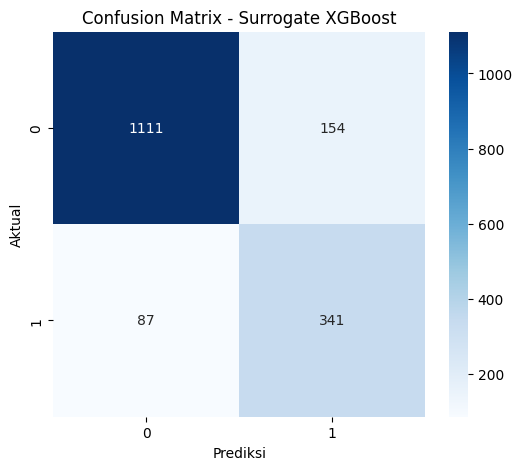

In [ ]:
# Confusion Matrix Surrogate XGBoost

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_sxgb9.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Surrogate XGBoost")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Surrogate XGBoost

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_sxgb9)
preprocessor = pipeline.named_steps['preprocessing']
sxgb         = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = sxgb.predict_proba(X_test_enc)[:, 1]
y_pred = sxgb.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.9127
Sensitivity   : 0.7967
Specificity   : 0.8783


<Figure size 800x600 with 0 Axes>

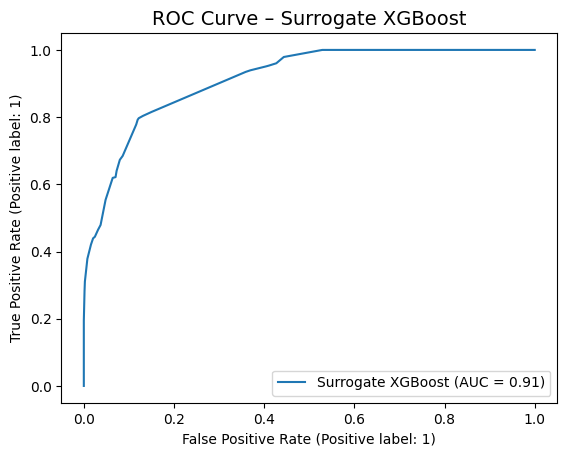

In [ ]:
# ROC Curve Surrogate XGBoost

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_sxgb9.named_steps['preprocessing']
grid_search  = loaded_pipeline_sxgb9.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Surrogate XGBoost",
    pos_label=1
)
plt.title("ROC Curve – Surrogate XGBoost", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x Surrogate XGBoost

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_sxgb9)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang DecisionTreeClassifier pakai best_params
    model_sxgb = DecisionTreeClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling', SMOTE(random_state=1)),
        ('model',          model_sxgb)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_surr)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  2  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  3  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  4  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  5  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  6  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  7  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  8  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration  9  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967
Iteration 10  —  ROC AUC: 0.9127,  Spec: 0.8783,  Sens: 0.7967

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.9127 ± 0.0000
Specificity : 0.8783 ± 0.0000
Sensitivity : 0.7967 ± 0.0000


## XGBOOST DEPTH 2

### Model

In [ ]:
# Training Model XGBoost Depth 2
from piml.models.xgb2 import XGB2Classifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # Corrected import statement
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import FunctionTransformer


# Define the parameter grid for GridSearchCV
param_xgb2 = {'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
              'gamma': [0, 0.1, 1, 3, 5],
              'reg_lambda': [0, 0.1, 0.2, 1, 5]}

# Create the XGB2Classifier model
xgb2_model = XGB2Classifier(n_estimators=250, tree_method="hist")

# Setup the GridSearchCV
xgb2_grid = GridSearchCV(estimator=xgb2_model,
                        param_grid=param_xgb2,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

# Create a pipeline with preprocessing, oversampling, and grid search
xgb2_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('dense', FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x, validate=False)),
    ('grid_search', xgb2_grid)
])

# Fit the pipeline
xgb2_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Week', 'Age',
                                                   'months_as_customer',
                                                   'policy_deductable',
                                                   'Above_Below_50K',
                                                   'policy_annual_premium',
                                                   'capital_gains',
                                                   'capital_loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_...
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('dense',
                 FunctionTransformer(func=<function <lambda> at 0x000001651F430280>)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=XGB2Classifier(n_estimators=250,
                                                       tree_method='hist'),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': [0, 0.1, 1, 3, 5],
                                          'reg_lambda': [0, 0.1, 0.2, 1, 5]},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model XGBoost Depth 2
import os
import joblib
import dill
from datetime import datetime

def save_full_pipeline(pipeline, model_name="xgb2_full_pipeline", models_dir="xgb2_9_models", use_dill=True):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model)
    sebagai satu file .pkl atau .dill yang bisa langsung di-load kembali.
    Jika use_dill=True, akan pakai dill.dump() untuk menghindari PicklingError.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    ext = "dill" if use_dill else "pkl"
    filename = f"{models_dir}/{model_name}_{timestamp}.{ext}"
    
    if use_dill:
        # Simpan dengan dill
        with open(filename, "wb") as f:
            dill.dump(pipeline, f)
    else:
        # Coba simpan dengan joblib seperti biasa
        joblib.dump(pipeline, filename)
    
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian:
# setelah kamu .fit(xgb2_pipeline, x_train, y_train):
saved_path_xgb2 = save_full_pipeline(xgb2_pipeline,
                                     model_name="xgb2_gridsearch_full",
                                     models_dir="xgb2_9_models",
                                     use_dill=True)


✅ Full pipeline saved to: xgb2_9_models/xgb2_gridsearch_full_20250617_183709.dill


In [ ]:
# Menampilkan hyperparameter terbaik XGBoost Depth 2
import dill

# 1) Muat file .dill
with open(saved_path_xgb2, "rb") as f:
    loaded_pipeline_xgb2 = dill.load(f)

# 2) Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_xgb2.named_steps['grid_search']

# 3) Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'eta': 0.2, 'gamma': 1, 'reg_lambda': 0.1}


In [158]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_xgb2.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
111       2.691368      0.086427         0.037088        0.009224       0.2   
106       3.352369      0.313032         0.050464        0.013346       0.2   
101      15.954519      6.567651         0.033209        0.002773       0.2   
102       2.762995      0.289225         0.032272        0.003973       0.2   
100      15.479960      6.435487         0.060045        0.021540       0.2   
..             ...           ...              ...             ...       ...   
19        2.247016      0.038828         0.022999        0.001095      0.01   
9         2.319530      0.084428         0.023201        0.001601      0.01   
14        2.289026      0.033824         0.027800        0.003763      0.01   
4         2.385178      0.140227         0.024496        0.002406      0.01   
24        2.749979      0.083480         0.028645        0.006191      0.01   

    param_gamma param_reg_lambda  \
111           1              0.1   
106         0.1              0.1   
101           0              0.1   
102           0              0.2   
100           0                0   
..          ...              ...   
19            3                5   
9           0.1                5   
14            1                5   
4             0                5   
24            5                5   

                                            params  split0_test_score  \
111    {'eta': 0.2, 'gamma': 1, 'reg_lambda': 0.1}           0.954291   
106  {'eta': 0.2, 'gamma': 0.1, 'reg_lambda': 0.1}           0.954291   
101    {'eta': 0.2, 'gamma': 0, 'reg_lambda': 0.1}           0.954291   
102    {'eta': 0.2, 'gamma': 0, 'reg_lambda': 0.2}           0.956087   
100      {'eta': 0.2, 'gamma': 0, 'reg_lambda': 0}           0.952554   
..                                             ...                ...   
19      {'eta': 0.01, 'gamma': 3, 'reg_lambda': 5}           0.803154   
9     {'eta': 0.01, 'gamma': 0.1, 'reg_lambda': 5}           0.803154   
14      {'eta': 0.01, 'gamma': 1, 'reg_lambda': 5}           0.803154   
4       {'eta': 0.01, 'gamma': 0, 'reg_lambda': 5}           0.803154   
24      {'eta': 0.01, 'gamma': 5, 'reg_lambda': 5}           0.803154   

     split1_test_score  split2_test_score  split3_test_score  \
111           0.976814           0.997687           0.998321   
106           0.976814           0.997409           0.998451   
101           0.975800           0.997409           0.998451   
102           0.974396           0.996774           0.998021   
100           0.976237           0.997122           0.998320   
..                 ...                ...                ...   
19            0.849468           0.872806           0.910276   
9             0.849468           0.872806           0.910276   
14            0.849468           0.872806           0.910276   
4             0.849468           0.872806           0.910276   
24            0.849468           0.872806           0.910276   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
111           0.998470         0.985117        0.017492                1  
106           0.998470         0.985087        0.017472                2  
101           0.998290         0.984848        0.017545                3  
102           0.998201         0.984696        0.016914                4  
100           0.998478         0.984542        0.018081                5  
..                 ...              ...             ...              ...  
19            0.895953         0.866331        0.037752              121  
9             0.895953         0.866331        0.037752              121  
14            0.895953         0.866331        0.037752              121  
4             0.895953         0.866331        0.037752              121  
24            0.895953         0.866331        0.037752              121  

[125 rows x 16 columns]

### Statistical Performances

In [165]:
import dill

#loaded_pipeline_xgb2 = dill.load(open('xgb2_9_models/xgb2_gridsearch_full_20250526_201351.dill', 'rb'))


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# Statistik Performa XGBoost Depth 2

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_xgb2.predict(x_test)
y_prob = loaded_pipeline_xgb2.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1265
           1       0.85      0.79      0.82       428

    accuracy                           0.91      1693
   macro avg       0.89      0.87      0.88      1693
weighted avg       0.91      0.91      0.91      1693



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

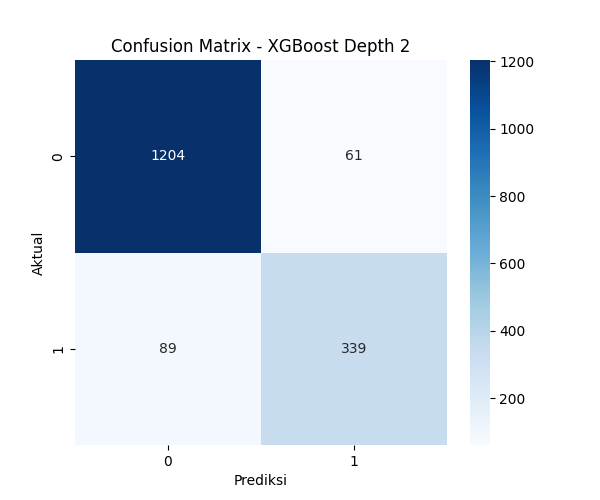

In [ ]:
# Confusion Matrix XGBoost Depth 2

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_xgb2.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - XGBoost Depth 2")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity XGBoost Depth 2

from scipy.sparse import issparse

# Load pipeline, pisahkan antara preprocessor & model
pipeline = loaded_pipeline_xgb2
preprocessor = pipeline.named_steps['preprocessing']
xgb2 = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# CRITICAL FIX: Convert sparse matrix to dense
if issparse(X_test_enc):
    print("✓ Converting sparse matrix to dense array...")
    X_test_enc = X_test_enc.toarray()
    print(f"✓ Converted shape: {X_test_enc.shape}")
else:
    print(f"✓ Already dense: {X_test_enc.shape}")

# Prediksi
y_prob = xgb2.predict_proba(X_test_enc)[:, 1]
y_pred = xgb2.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

✓ Already dense: (1693, 81)
ROC AUC Score : 0.9718
Sensitivity   : 0.7921
Specificity   : 0.9518


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<Figure size 800x600 with 0 Axes>

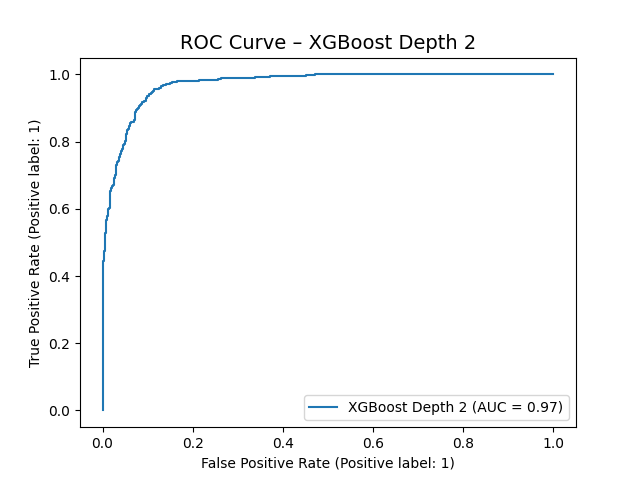

Checking if preprocessing outputs sparse matrix:
Type: <class 'numpy.ndarray'>
Is sparse: False


"\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\n# When creating your preprocessing pipeline, set sparse=False for OneHotEncoder\ncategorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('cat', categorical_transformer, categorical_features),\n        ('num', numerical_transformer, numerical_features)\n    ],\n    sparse_threshold=0  # This ensures output is dense\n)\n"

In [ ]:
ROC Curve XGBoost Depth 2

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create a custom transformer to convert sparse to dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if hasattr(X, "toarray"):  # Check if it's a sparse matrix
            return X.toarray()
        return X

# Method 1: Add DenseTransformer to your pipeline
# Extract components from your loaded pipeline
preproc = loaded_pipeline_xgb2.named_steps['preprocessing']
grid_search = loaded_pipeline_xgb2.named_steps['grid_search']
best_model = grid_search.best_estimator_

# Build pipeline with dense converter
infer = Pipeline([
    ('preprocessing', preproc),
    ('to_dense', DenseTransformer()),  # Add this step
    ('model', best_model)
])

# Now predict probabilities
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="XGBoost Depth 2",
    pos_label=1
)
plt.title("ROC Curve – XGBoost Depth 2", fontsize=14)
plt.show()

# Method 2: Alternative - Manual conversion
# If you prefer to do it manually:
"""
# Transform the test data through preprocessing
x_test_preprocessed = preproc.transform(x_test)

# Convert to dense if sparse
if hasattr(x_test_preprocessed, "toarray"):
    x_test_dense = x_test_preprocessed.toarray()
else:
    x_test_dense = x_test_preprocessed

# Get probabilities
y_prob = best_model.predict_proba(x_test_dense)[:, 1]
"""

# Method 3: Check and fix preprocessing pipeline
# If you want to modify the preprocessing to output dense matrices
print("Checking if preprocessing outputs sparse matrix:")
x_sample_processed = preproc.transform(x_test[:5])
print(f"Type: {type(x_sample_processed)}")
print(f"Is sparse: {hasattr(x_sample_processed, 'toarray')}")

# If your preprocessing uses OneHotEncoder, you can set sparse=False
# Example of how to modify OneHotEncoder in preprocessing:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# When creating your preprocessing pipeline, set sparse=False for OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    sparse_threshold=0  # This ensures output is dense
)
"""

In [ ]:
# Iterasi Simulasi 10x XGBoost Depth 2
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from piml.models.xgb2.xgboost import XGB2Classifier

# Create a custom transformer to convert sparse to dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if hasattr(X, "toarray"):  # Check if it's a sparse matrix
            return X.toarray()
        return X

# Load your pipeline and extract best parameters
grid_pipeline = loaded_pipeline_xgb2
grid_search = grid_pipeline.named_steps['grid_search']
best_params = grid_search.best_params_

# Prepare lists for metrics
roc_auc_list = []
specificity_list = []
sensitivity_list = []

# Loop 10 times with fresh pipeline each iteration
for i in range(1, 11):
    # a) Create XGB2Classifier with best_params
    model_xgb2 = XGB2Classifier(n_estimators=250, tree_method="hist", **best_params)
    
    # b) Build pipeline with DenseTransformer
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # your preprocessing pipeline
        ('to_dense', DenseTransformer()),          # Convert sparse to dense
        ('oversampling', SMOTE(random_state=1)),   # SMOTE only in training
        ('model', model_xgb2)
    ])
    
    # c) Fit on training data
    pipeline.fit(x_train, y_train)
    
    # d) Predict & get probabilities on test data
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # e) Calculate ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # f) Calculate specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # g) Display iteration results
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Calculate means and standard deviations
roc_mean = np.mean(roc_auc_list)
roc_std = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")

# Alternative approach: Modify preprocessing to output dense matrices
# If you want to fix this at the source, here's how to modify your preprocessing:

"""
# Option 1: Set sparse_threshold=0 in ColumnTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    sparse_threshold=0  # This ensures dense output
)

# Option 2: Set sparse=False in OneHotEncoder if you're using it
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(
    sparse=False,  # Output dense arrays
    handle_unknown='ignore'
)
"""

# Debug: Check what your preprocessing outputs
print("\nDebugging preprocessing output:")
sample_processed = preprocessing.fit_transform(x_train[:5], y_train[:5])
print(f"Type: {type(sample_processed)}")
print(f"Is sparse: {hasattr(sample_processed, 'toarray')}")
if hasattr(sample_processed, 'toarray'):
    print(f"Shape: {sample_processed.shape}")
    print("Converting to dense for XGBoost compatibility...")
else:
    print(f"Shape: {sample_processed.shape}")
    print("Already dense - good to go!")


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Iteration  1  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  2  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  3  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  4  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  5  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  6  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  7  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  8  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration  9  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921
Iteration 10  —  ROC AUC: 0.9718,  Spec: 0.9518,  Sens: 0.7921

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.9718 ± 0.0000
Specificity : 0.9518 ± 0.0000
Sensitivity : 0.7921 ± 0.0000

Debugging preprocessing output:
Type: <class 'numpy.ndarray'>
Is sparse: False
Shape: (5, 49)
Already dense - good to go!


Shape X_pre (data asli setelah preprocessing): (6772, 81)
Intercept log-odds (mu) di-set dari rata-rata logit model (data asli): -1.4907492
Prevalensi positif di data asli (fraud fraction): 0.24497932663910219
Memilih top-10 fitur indices (berdasarkan weight): [14, 2, 5, 7, 12, 15, 8, 13, 6, 11] -> ['property_claim', 'months_as_customer', 'policy_annual_premium', 'capital_loss', 'total_claim_amount', 'vehicle_claim', 'incident_hour_of_the_day', 'injury_claim', 'capital_gains', 'witnesses']
Final used features setelah filter (memiliki thresholds): [14, 2, 5, 7, 12, 15, 8, 13, 6, 11] -> ['property_claim', 'months_as_customer', 'policy_annual_premium', 'capital_loss', 'total_claim_amount', 'vehicle_claim', 'incident_hour_of_the_day', 'injury_claim', 'capital_gains', 'witnesses']
=== Debug: h_raw sebelum purify ===
  Fitur 14 (property_claim), bins=33, sample h_raw[:5]=[ 0.          0.          0.98405163 -0.07919288  0.25449552] ...
  Fitur 2 (months_as_customer), bins=31, sample h_raw[:5

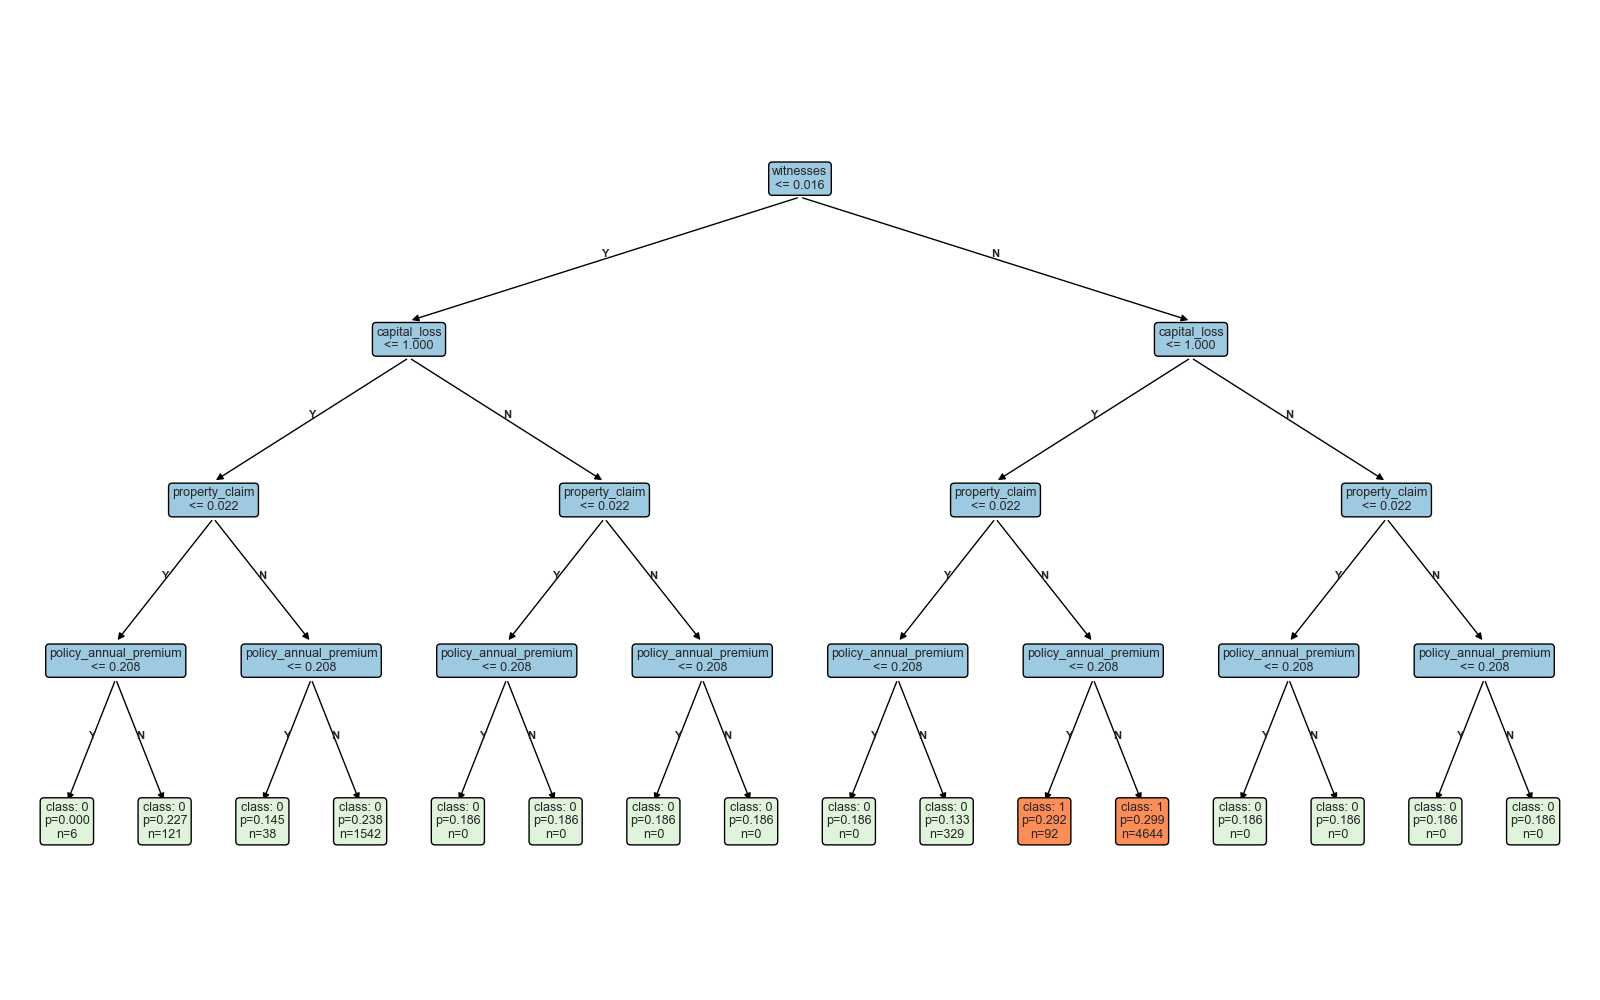

In [ ]:
# Menampilkan Pohon Tunggal GAMI dan Full Rule Set dari XGBoost Depth 2 
import dill
import json
import numpy as np
import random
from itertools import product, combinations
from math import log, exp
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import pandas as pd

# ========================================
#  PASTIKAN: x_train, y_train telah didefinisikan
#  x_train: pd.DataFrame fitur asli sebelum SMOTE, kolom sesuai pipeline preprocessing
#  y_train: pd.Series label asli (0/1)
# ========================================
try:
    x_train
    y_train
except NameError:
    raise RuntimeError(
        "Variabel x_train dan y_train belum didefinisikan. "
        "Silakan siapkan DataFrame x_train dan Series y_train sesuai pipeline Anda."
    )

# ----------------------------------------
# 1) Load pipeline + XGB2Classifier terlatih
# ----------------------------------------
dill_path = "xgb2_9_models/xgb2_gridsearch_full_20250617_183709.dill"  # sesuaikan path jika perlu
with open(dill_path, "rb") as f:
    pipeline = dill.load(f)

preproc = pipeline.named_steps.get("preprocessing")
if preproc is None:
    raise RuntimeError("Pipeline tidak memiliki named_steps['preprocessing']")
gs = pipeline.named_steps.get("grid_search") or pipeline.named_steps.get("model")
if gs is None:
    raise RuntimeError("Pipeline tidak memiliki named_steps['grid_search'] atau ['model']")
if hasattr(gs, "best_estimator_"):
    est = gs.best_estimator_
else:
    est = gs
xgb2 = est
if hasattr(xgb2, "estimator_"):
    xgb2 = xgb2.estimator_
try:
    booster = xgb2.get_booster()
except Exception as e:
    raise RuntimeError(f"Gagal ambil booster dari model: {e}")

# ----------------------------------------
# 2) Transform x_train dan hitung probabilitas asli
# ----------------------------------------
X_pre = preproc.transform(x_train)
if hasattr(X_pre, "toarray"):
    X_pre = X_pre.toarray()
print("Shape X_pre (data asli setelah preprocessing):", X_pre.shape)

proba = xgb2.predict_proba(X_pre)[:, 1]
# Hindari 0 atau 1 persis
eps = 1e-6
proba = np.clip(proba, eps, 1 - eps)

# Rata-rata logit untuk intercept mu
logit = np.log(proba / (1 - proba))
mu = logit.mean()
print("Intercept log-odds (mu) di-set dari rata-rata logit model (data asli):", mu)

# Prevalensi positif
prevalence = float(y_train.mean())
print("Prevalensi positif di data asli (fraud fraction):", prevalence)

# ----------------------------------------
# 3) Feature names pasca-preprocessing
# ----------------------------------------
feat_out = preproc.get_feature_names_out()
def clean_feat(feat: str) -> str:
    return feat.split("__",1)[1] if "__" in feat else feat

# ----------------------------------------
# 4) Pilih top_k fitur untuk GAMI
# ----------------------------------------
importance_type = "weight"  # bisa "gain" atau "weight"
score_imp = booster.get_score(importance_type=importance_type)
feat_imp = []
for k, v in score_imp.items():
    if k.startswith("f") and k[1:].isdigit():
        idx = int(k[1:])
        if idx < len(feat_out):
            feat_imp.append((idx, clean_feat(feat_out[idx]), v))
feat_imp_sorted = sorted(feat_imp, key=lambda x: x[2], reverse=True)
top_k = 10  # sesuaikan jika perlu
used = [idx for idx, name, imp in feat_imp_sorted[:top_k]]
print(f"Memilih top-{top_k} fitur indices (berdasarkan {importance_type}):", used,
      "->", [clean_feat(feat_out[i]) for i in used])
if not used:
    raise RuntimeError("Tidak ada fitur terpilih; periksa model atau data.")

# ----------------------------------------
# 5) Kumpulkan thresholds (bins_1d) hanya untuk fitur di 'used'
# ----------------------------------------
trees_json = booster.get_dump(dump_format="json")
trees = [json.loads(t) for t in trees_json]

bins_1d = {i: set() for i in used}
def collect_thresholds(node):
    if "leaf" in node:
        return
    split = node.get("split", "")
    if split.startswith("f") and split[1:].isdigit():
        idx = int(split[1:])
        if idx in bins_1d:
            thr = node["split_condition"]
            bins_1d[idx].add(thr)
    for ch in node.get("children", []):
        collect_thresholds(ch)

for tree in trees:
    collect_thresholds(tree)

# Sorted lists; hapus fitur tanpa threshold
for i in list(bins_1d.keys()):
    lst = sorted(bins_1d[i])
    if len(lst) == 0:
        print(f"Fitur index {i} ({clean_feat(feat_out[i])}) tidak punya threshold, dihapus dari used.")
        used.remove(i)
        del bins_1d[i]
    else:
        bins_1d[i] = lst
print("Final used features setelah filter (memiliki thresholds):", used,
      "->", [clean_feat(feat_out[i]) for i in used])
if not used:
    raise RuntimeError("Semua fitur top_k tidak memiliki threshold split; pilih top_k berbeda atau turunkan.")

# ----------------------------------------
# 6) Inisialisasi container raw effects
# ----------------------------------------
h_raw = {i: np.zeros(len(bins_1d[i]) + 1) for i in used}
f_raw = {}
for i, j in combinations(sorted(used), 2):
    a, b = (i, j) if i < j else (j, i)
    f_raw[(a, b)] = np.zeros((len(bins_1d[a]) + 1, len(bins_1d[b]) + 1))

# ----------------------------------------
# 7) Route semua pohon: akumulasi leaf values ke h_raw / f_raw
# ----------------------------------------
def route_tree(node, path):
    if "leaf" in node:
        val = node["leaf"]
        path_used = [p for p in path if p[0] in used]
        last_split = {}
        for feat_idx, op, thr in path_used:
            last_split[feat_idx] = (op, thr)
        if len(last_split) == 1:
            i, (op, thr) = next(iter(last_split.items()))
            bi = np.digitize(thr, bins_1d[i])
            h_raw[i][bi] += val
        elif len(last_split) == 2:
            items = sorted(last_split.items(), key=lambda x: x[0])
            (i1, (_, thr1)), (i2, (_, thr2)) = items
            a, b = (i1, i2) if i1 < i2 else (i2, i1)
            if i1 < i2:
                thr_a, thr_b = thr1, thr2
            else:
                thr_a, thr_b = thr2, thr1
            bi = np.digitize(thr_a, bins_1d[a])
            bj = np.digitize(thr_b, bins_1d[b])
            f_raw[(a, b)][bi, bj] += val
        return
    split = node.get("split", "")
    if split.startswith("f") and split[1:].isdigit():
        idx = int(split[1:])
    else:
        idx = None
    thr = node.get("split_condition", None)
    if idx is not None:
        route_tree(node["children"][0], path + [(idx, "<", thr)])
        route_tree(node["children"][1], path + [(idx, ">=", thr)])
    else:
        for ch in node.get("children", []):
            route_tree(ch, path)

for tree in trees:
    route_tree(tree, [])

# Debug sebelum purify
print("=== Debug: h_raw sebelum purify ===")
for i in used:
    print(f"  Fitur {i} ({clean_feat(feat_out[i])}), bins={len(bins_1d[i])+1}, sample h_raw[:5]={h_raw[i][:5]} ...")
print("=== Debug: f_raw sebelum purify sums ===")
for (i, j), mat in f_raw.items():
    print(f"  Interaksi ({i},{j}), sum={mat.sum():.6f}, shape={mat.shape}")

# ----------------------------------------
# 8) Purifikasi interaksi agar conditional mean = 0
# ----------------------------------------
def purify(mat, h_i, h_j, tol=1e-6, max_iter=10):
    for _ in range(max_iter):
        row_m = mat.mean(axis=1)
        mat -= row_m[:, None]; h_i += row_m
        col_m = mat.mean(axis=0)
        mat -= col_m;     h_j += col_m
        if np.all(np.abs(row_m) < tol) and np.all(np.abs(col_m) < tol):
            break

for (i, j), mat in f_raw.items():
    purify(mat, h_raw[i], h_raw[j])

# ----------------------------------------
# 9) Zero-center main effects
# ----------------------------------------
for i in used:
    mu_i = h_raw[i].mean()
    h_raw[i] -= mu_i

# Debug setelah purify
print("=== Debug: h_raw setelah purify & zero-center ===")
for i in used:
    print(f"  Fitur {i} ({clean_feat(feat_out[i])}), std(h_raw)={np.std(h_raw[i]):.6f}, h_raw[:5]={h_raw[i][:5]} ...")
print("=== Debug: f_raw setelah purify sums ===")
for (i, j), mat in f_raw.items():
    print(f"  Interaksi ({i},{j}), sum={mat.sum():.6f}, shape={mat.shape}")

# ----------------------------------------
# 10) Fungsi compute_V_for_bin_indices
# ----------------------------------------
def compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu):
    v = mu
    for i in used:
        bi = cell[i]
        v += h_raw[i][bi]
    for (i, j), mat in f_raw.items():
        if i in cell and j in cell:
            bi = cell[i]; bj = cell[j]
            v += mat[bi, bj]
    return v

# ----------------------------------------
# 11) Estimasi split stats & find_best_split
# ----------------------------------------
def estimate_group_stats_split(feature_i, t_idx, used, bins_1d, h_raw, f_raw, mu,
                               max_enum=5000, n_samples=1000, random_state=1):
    other_feats = [j for j in used if j != feature_i]
    total_combos = 1
    for j in other_feats:
        total_combos *= (len(bins_1d[j]) + 1)
        if total_combos > max_enum:
            break
    def all_combos_other():
        return product(*[range(len(bins_1d[j])+1) for j in other_feats])
    def process_bin_group(bin_i_values, do_sampling):
        vals = []
        if not do_sampling and total_combos <= max_enum:
            for bi in bin_i_values:
                for combo in all_combos_other():
                    cell = {feature_i: bi}
                    for k, j in enumerate(other_feats):
                        cell[j] = combo[k]
                    vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            if arr.size == 0:
                return 0.0, 0.0, 0
            return arr.mean(), arr.var(), arr.size
        else:
            rng = random.Random(random_state)
            vals_s = []
            for _ in range(n_samples):
                bi = rng.choice(bin_i_values)
                cell = {feature_i: bi}
                for j in other_feats:
                    cell[j] = rng.randrange(len(bins_1d[j]) + 1)
                vals_s.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals_s, dtype=float)
            return arr.mean(), arr.var(), arr.size
    max_bin_i = len(bins_1d[feature_i])
    left_bins = list(range(0, t_idx+1))
    right_bins = list(range(t_idx+1, max_bin_i+1))
    do_sampling = total_combos > max_enum
    return process_bin_group(left_bins, do_sampling), process_bin_group(right_bins, do_sampling)

def find_best_split(used, bins_1d, h_raw, f_raw, mu,
                    max_enum=5000, n_samples=1000, random_state=1):
    counts = [len(bins_1d[j]) + 1 for j in used]
    total_parent = 1
    for c in counts:
        total_parent *= c
        if total_parent > max_enum:
            break
    def estimate_parent():
        if total_parent <= max_enum:
            vals = []
            for combo in product(*[range(len(bins_1d[j])+1) for j in used]):
                cell = {j: combo[k] for k,j in enumerate(used)}
                vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            return arr.mean(), arr.var(), arr.size
        else:
            rng = random.Random(random_state)
            vals = []
            for _ in range(n_samples):
                combo = [rng.randrange(len(bins_1d[j])+1) for j in used]
                cell = {j: combo[k] for k,j in enumerate(used)}
                vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            return arr.mean(), arr.var(), arr.size
    mean_P, var_P, n_P = estimate_parent()

    best_i = None; best_t = None; best_reduction = -np.inf; best_stats = None
    for i in used:
        max_bin_i = len(bins_1d[i])
        for t_idx in range(0, max_bin_i):
            (mean_L, var_L, n_L), (mean_R, var_R, n_R) = estimate_group_stats_split(
                i, t_idx, used, bins_1d, h_raw, f_raw, mu,
                max_enum=max_enum, n_samples=n_samples, random_state=random_state
            )
            total_n = n_L + n_R
            if total_n == 0:
                continue
            within_var = (n_L*var_L + n_R*var_R) / total_n
            reduction = var_P - within_var
            if reduction > best_reduction:
                best_reduction = reduction
                best_i, best_t = i, t_idx
                best_stats = {
                    'mean_parent': mean_P, 'var_parent': var_P, 'n_parent': n_P,
                    'mean_L': mean_L, 'var_L': var_L, 'n_L': n_L,
                    'mean_R': mean_R, 'var_R': var_R, 'n_R': n_R,
                }
    return best_i, best_t, best_reduction, best_stats

# ----------------------------------------
# 12) Kelas node GAMI
# ----------------------------------------
class GamiNode:
    def __init__(self, feature_idx=None, threshold_idx=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx
        self.threshold_idx = threshold_idx
        self.left = left
        self.right = right
        self.value = value

# ----------------------------------------
# 13) Build GAMI-tree (rekursif)
# ----------------------------------------
def build_gami_tree(used, bins_1d, h_raw, f_raw, mu,
                    max_depth=4, min_reduction=1e-4,
                    max_enum=5000, n_samples=1000, random_state=1, depth=0):
    best_i, best_t, best_red, stats = find_best_split(
        used, bins_1d, h_raw, f_raw, mu,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state
    )
    if best_i is None or best_red < min_reduction or depth >= max_depth:
        if stats is not None:
            val = stats['mean_parent']
        else:
            rng = random.Random(random_state + depth)
            if len(used) > 0:
                combo = [rng.randrange(len(bins_1d[j])+1) for j in used]
                cell = {j: combo[k] for k,j in enumerate(used)}
                val = compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu)
            else:
                val = mu
        return GamiNode(value=val)
    node = GamiNode(feature_idx=best_i, threshold_idx=best_t)
    used_child = [j for j in used if j != best_i]
    node.left = build_gami_tree(
        used_child, bins_1d, h_raw, f_raw, mu,
        max_depth=max_depth, min_reduction=min_reduction,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state, depth=depth+1
    )
    node.right = build_gami_tree(
        used_child, bins_1d, h_raw, f_raw, mu,
        max_depth=max_depth, min_reduction=min_reduction,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state, depth=depth+1
    )
    return node

gami_root = build_gami_tree(
    used, bins_1d, h_raw, f_raw, mu,
    max_depth=4,
    min_reduction=1e-4,
    max_enum=5000,
    n_samples=1000,
    random_state=42
)
print("GAMI-Tree dibangun dengan max_depth=4")

# ----------------------------------------
# 14) Cetak full rules set (data-driven p leaf)
# ----------------------------------------
def print_rules_gami_with_mask(node, bins_1d, feat_out, X_pre, proba, prevalence, mask=None, indent_level=0):
    if mask is None:
        mask = np.ones(X_pre.shape[0], dtype=bool)
    indent = "  " * indent_level
    if node.feature_idx is not None:
        i = node.feature_idx
        thr_val = bins_1d[i][node.threshold_idx]
        feat_name = clean_feat(feat_out[i])
        cond_left = f"{feat_name} <= {thr_val:.4f}"
        print(f"{indent}|-- {cond_left}")
        mask_left = mask & (X_pre[:, i] <= thr_val)
        print_rules_gami_with_mask(node.left, bins_1d, feat_out, X_pre, proba, prevalence, mask_left, indent_level+1)

        cond_right = f"{feat_name} >  {thr_val:.4f}"
        print(f"{indent}|-- {cond_right}")
        mask_right = mask & (X_pre[:, i] > thr_val)
        print_rules_gami_with_mask(node.right, bins_1d, feat_out, X_pre, proba, prevalence, mask_right, indent_level+1)
    else:
        if mask.sum() > 0:
            p_leaf = proba[mask].mean()
        else:
            logodds = node.value
            p_leaf = 1/(1+exp(-logodds))
        cls = 1 if p_leaf > prevalence else 0
        print(f"{indent}|-- class: {cls}    (p={p_leaf:.3f}, n_samples={mask.sum()})")

print("\n=== FULL RULE SET GAMI (data-driven p leaf) (max_depth=4) ===")
print_rules_gami_with_mask(gami_root, bins_1d, feat_out, X_pre, proba, prevalence)

# ----------------------------------------
# 15) Visualisasi pohon GAMI dengan kotak menggunakan bbox di ax.text
# ----------------------------------------
def draw_edge(ax, x_parent, y_parent, x_child, y_child, label=None):
    offset = 0.4
    start = (x_parent, y_parent - offset)
    end   = (x_child,  y_child + offset)
    arrow = FancyArrowPatch(start, end,
                            arrowstyle='-|>', mutation_scale=10,
                            linewidth=1.0, color='black', zorder=0)
    ax.add_patch(arrow)
    if label is not None:
        mx = (start[0] + end[0]) / 2
        my = (start[1] + end[1]) / 2
        ax.text(mx, my + 0.1, label, ha='center', va='center',
                fontsize=8, fontweight='bold', zorder=3)

def plot_gami_tree_rectangular_bbox(gami_root, feat_out, bins_1d, clean_feat_func,
                               X_pre, proba, prevalence,
                               figsize=(14, 8), fontsize=9,
                               vertical_gap=3.5, horizontal_gap=3.5):
    """
    Visualisasi GAMI-tree dengan kotak pada tiap node, ukuran otomatis mengikuti teks
    (menggunakan bbox pada ax.text), dan leaf diwarnai berdasarkan p_leaf vs prevalence.
    """
    # 1) Hitung posisi node dengan inorder traversal
    def compute_positions(node, depth=0, x_counter=[0], pos=None):
        if pos is None:
            pos = {}
        if node is None:
            return pos
        if node.feature_idx is not None and node.left is not None:
            compute_positions(node.left, depth+1, x_counter, pos)
        x = x_counter[0]
        pos[node] = (x, depth)
        x_counter[0] += 1
        if node.feature_idx is not None and node.right is not None:
            compute_positions(node.right, depth+1, x_counter, pos)
        return pos

    pos_idx = compute_positions(gami_root, depth=0, x_counter=[0], pos={})
    coords = {}
    for node, (x_idx, depth) in pos_idx.items():
        x = x_idx * horizontal_gap
        y = - depth * vertical_gap
        coords[node] = (x, y)

    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # 2) Assign mask per node untuk menghitung p leaf
    node_masks = {}
    def assign_masks(node, mask):
        node_masks[node] = mask
        if node.feature_idx is not None:
            i = node.feature_idx
            thr_val = bins_1d[i][node.threshold_idx]
            mask_left = mask & (X_pre[:, i] <= thr_val)
            mask_right = mask & (X_pre[:, i] > thr_val)
            assign_masks(node.left, mask_left)
            assign_masks(node.right, mask_right)
    mask_root = np.ones(X_pre.shape[0], dtype=bool)
    assign_masks(gami_root, mask_root)

    # 3) Gambar edges terlebih dahulu
    for node, (x, y) in coords.items():
        if node.feature_idx is not None:
            if node.left is not None:
                xc, yc = coords[node.left]
                draw_edge(ax, x, y, xc, yc, label='Y')
            if node.right is not None:
                xc, yc = coords[node.right]
                draw_edge(ax, x, y, xc, yc, label='N')

    # 4) Gambar nodes: gunakan ax.text dengan bbox
    for node, (x, y) in coords.items():
        if node.feature_idx is None:
            # Leaf: hitung p rata-rata pada subset data
            mask = node_masks[node]
            if mask.sum() > 0:
                p_leaf = proba[mask].mean()
            else:
                logodds = node.value
                p_leaf = 1/(1+np.exp(-logodds))
            cls = 1 if p_leaf > prevalence else 0
            text = f"class: {cls}\np={p_leaf:.3f}\nn={mask.sum()}"
            # Pewarnaan leaf: misal hijau muda jika <= prevalence, merah jika > prevalence
            face = '#e0f3db' if p_leaf <= prevalence else '#fc8d59'
            # Gunakan bbox: boxstyle "round,pad=0.3" atau "square,pad=0.3"
            ax.text(
                x, y, text,
                ha='center', va='center',
                fontsize=fontsize,
                bbox=dict(boxstyle="round,pad=0.3", facecolor=face, edgecolor='black'),
                zorder=2
            )
        else:
            i = node.feature_idx
            thr_val = bins_1d[i][node.threshold_idx]
            feat_name = clean_feat_func(feat_out[i])
            text = f"{feat_name}\n<= {thr_val:.3f}"
            ax.text(
                x, y, text,
                ha='center', va='center',
                fontsize=fontsize,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='#9ecae1', edgecolor='black'),
                zorder=2
            )

    # 5) Atur limits agar seluruh pohon tampil
    all_x = [coord[0] for coord in coords.values()]
    all_y = [coord[1] for coord in coords.values()]
    if all_x and all_y:
        margin_x = horizontal_gap
        margin_y = vertical_gap
        ax.set_xlim(min(all_x)-margin_x, max(all_x)+margin_x)
        ax.set_ylim(min(all_y)-margin_y, max(all_y)+margin_y)
    plt.tight_layout()
    plt.show()

# Panggil visualisasi
print("\nMenampilkan visualisasi pohon GAMI (kotak otomatis via bbox, data-driven p leaf):")
plot_gami_tree_rectangular_bbox(
    gami_root,
    feat_out=feat_out,
    bins_1d=bins_1d,
    clean_feat_func=clean_feat,
    X_pre=X_pre,
    proba=proba,
    prevalence=prevalence,
    figsize=(16, 10),
    fontsize=9,
    vertical_gap=3.5,
    horizontal_gap=3.5
)
